<center><font size=6> Bank Loan Default </font></center>

## Problem Statement

### Context

The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

**ID**	      unique ID assigned to each applicant

**loan_amnt**	loan amount ($) applied each applicant

**loan_term**	Loan duration in years

**interest_rate**	Applicable interest rate on Loan in %

**loan_grade**	Loan Grade Assigned by the bank

**loan_subgrade**	Loan SubGrade Assigned by the bank

**job_experience**	Number of years job experience

**home_ownership**	Status of House Ownership

**annual_income**	Annual income of the applicant

**income_verification_status**	Status of Income verification by the bank

**loan_purpose**	Purpose of loan

**state_code**	State code of the applicant's residence

**debt_to_income**	Ratio to total debt to income (total debt might include other loan aswell)

**delinq_2yrs**	number of 30+ days delinquency in past 2 years

**public_records**	number of legal cases against the applicant

**revolving_balance**	total credit revolving balance

**total_acc**	total number of credit lines available in members credit line

**interest_receive**	total interest received by the bank on the loan

**application_type**	Whether the applicant has applied the loan by creating
individuall or joint account

**last_week_pay**	How many months have the applicant paid the loan EMI already

**total_current_balance**	total current balance of all the accounts of applicant

**total_revolving_limit**	total revolving credit limit

**default**	status of loan amount, 1 = Defaulter, 0 = Non Defaulters

The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


## Importing necessary libraries

In [460]:
# Installing the libraries with the specified version.
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [461]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, AdamW
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [462]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [463]:
d_train = pd.read_csv("/content/drive/My Drive/aa-hackathon-2/Train_set.csv")    # complete the code to load the dataset

In [464]:
d_train.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [465]:
# Step 1: Load the datasets
train_data = pd.read_csv('/content/drive/My Drive/aa-hackathon-2/Train_set.csv')
test_data = pd.read_csv('/content/drive/My Drive/aa-hackathon-2/Test_set.csv')
df = train_data.copy()
dt = test_data.copy()
# Step 2: Explore the data (optional - for understanding the dataset)
df.head()


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [466]:
dt.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0


In [467]:
df.shape

(93174, 23)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [469]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,93174.0,NaN,NaN,NaN,35050211.389476,24149262.073938,70735.0,10859832.5,37107507.0,58598949.5,73519746.0
loan_amnt,93174.0,NaN,NaN,NaN,14733.861378,8428.184858,500.0,8000.0,13000.0,20000.0,35000.0
loan_term,93174,2,3 years,65211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate,93174.0,NaN,NaN,NaN,13.233433,4.368728,5.32,9.99,12.99,16.2,28.99
loan_grade,93174,7,B,26865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_subgrade,93174,35,B3,5879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_experience,88472,3,<5 Years,40610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,93174,5,MORTGAGE,46445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,93173.0,NaN,NaN,NaN,75028.258559,69454.783994,1200.0,45000.0,64000.0,90000.0,9500000.0
income_verification_status,93174,3,Source Verified,34487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [470]:
display(df.describe(include='float').T)

,count,mean,std,min,25%,50%,75%,max
interest_rate,93174.0,13.233433,4.368728,5.32,9.99,12.990,16.2000,28.99
annual_income,93173.0,75028.258559,69454.783994,1200.00,45000.00,64000.000,90000.0000,9500000.00
debt_to_income,93174.0,18.127623,8.563084,0.00,11.93,17.640,23.8900,672.52
delinq_2yrs,93172.0,0.316994,0.880859,0.00,0.00,0.000,0.0000,22.00
public_records,93172.0,0.196121,0.581188,0.00,0.00,0.000,0.0000,49.00
total_acc,93172.0,25.248905,11.855061,1.00,17.00,24.000,32.0000,119.00
interest_receive,93174.0,1747.263530,2088.236141,0.00,439.88,1070.755,2219.6125,23172.31
last_week_pay,91250.0,58.154882,44.326560,0.00,22.00,48.000,83.0000,291.00
total_current_balance,85788.0,139252.923288,157686.790921,0.00,29642.00,79363.500,207160.0000,8000078.00
total_revolving_limit,85788.0,32085.902889,47052.514708,0.00,14000.00,23700.000,39700.0000,9999999.00


In [471]:
df.describe(include='object').T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


In [472]:
df.drop(['ID'], axis=1, inplace=True)

In [473]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


## Exploratory Data Analysis

### Univariate Analysis

In [474]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [475]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

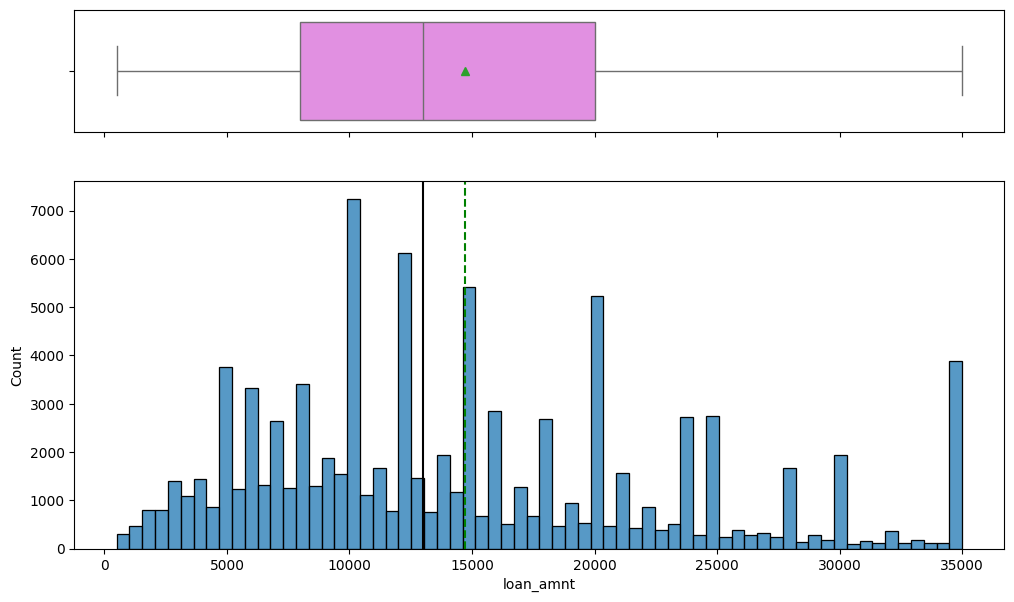

In [476]:
histogram_boxplot(df,'loan_amnt')

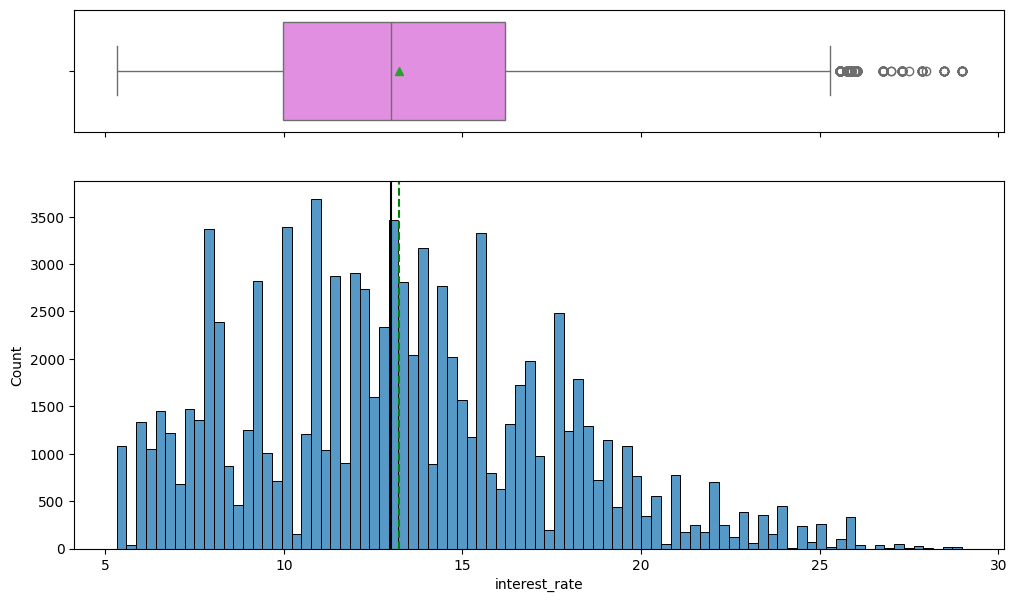

In [477]:
histogram_boxplot(df, 'interest_rate')

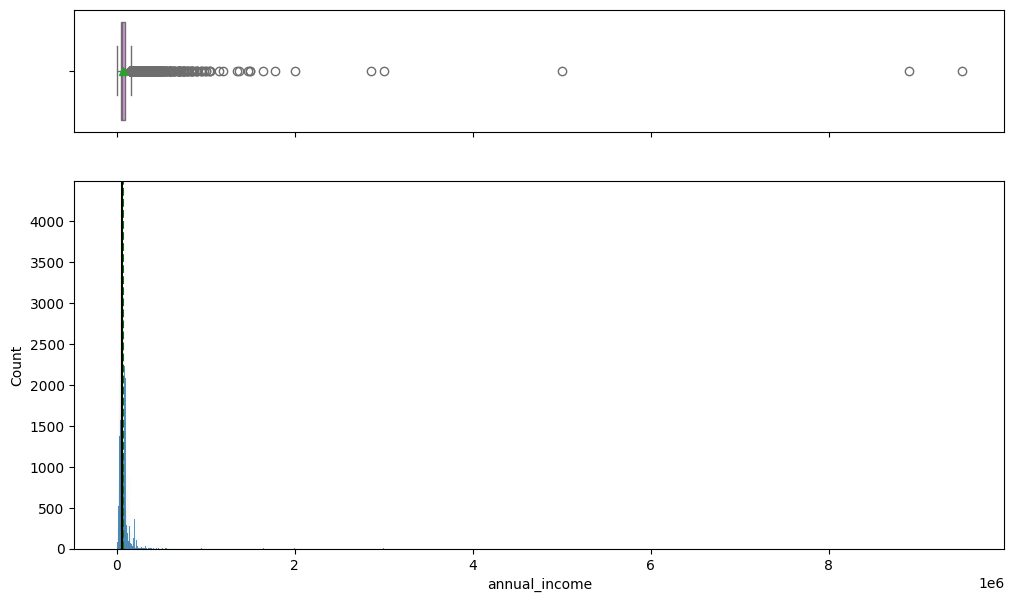

In [478]:
histogram_boxplot(df, 'annual_income')

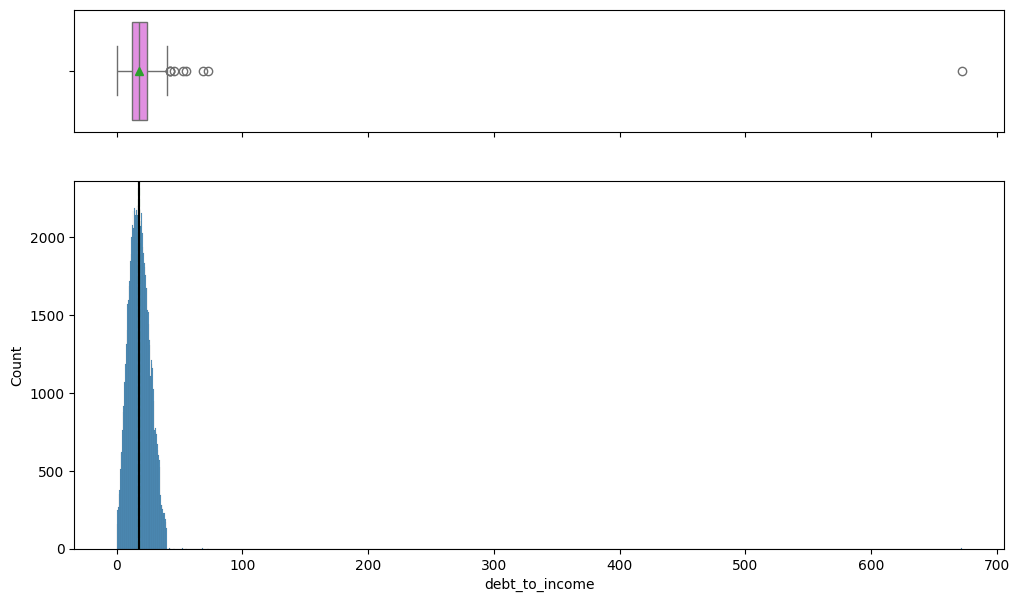

In [479]:
histogram_boxplot(df, 'debt_to_income')

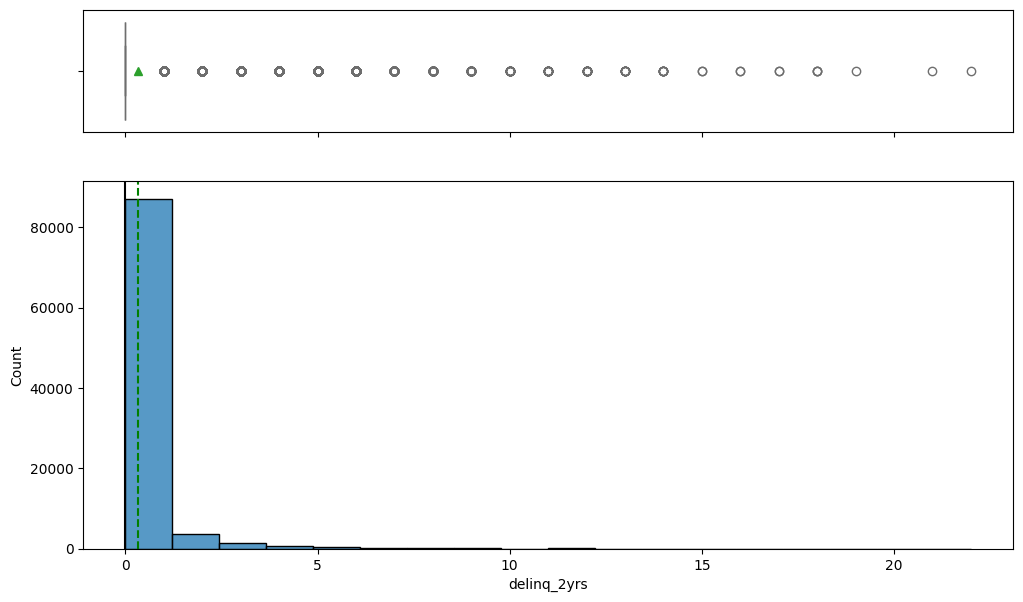

In [480]:
histogram_boxplot(df, 'delinq_2yrs')

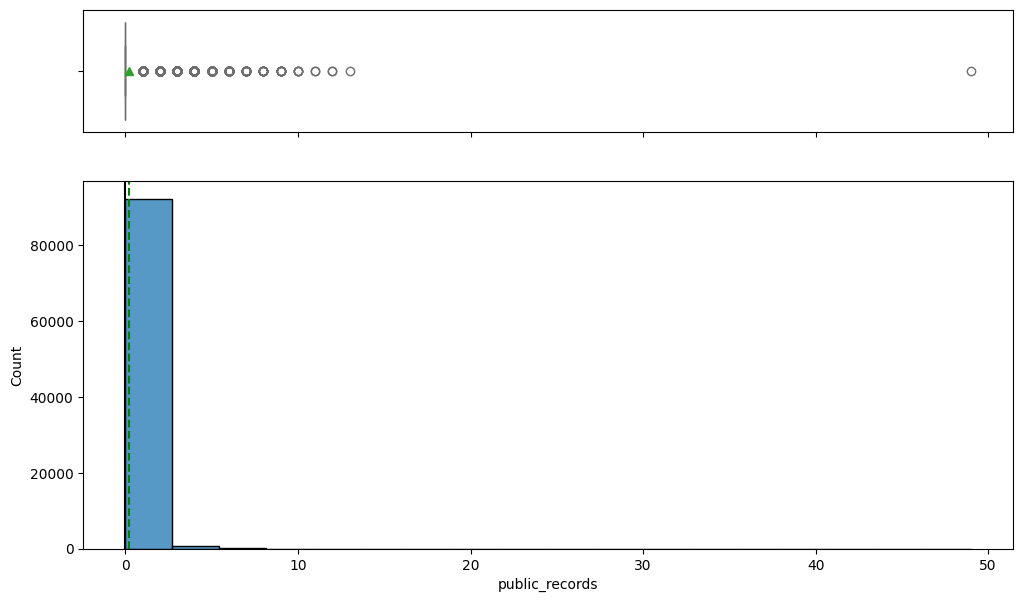

In [481]:
histogram_boxplot(df, 'public_records')

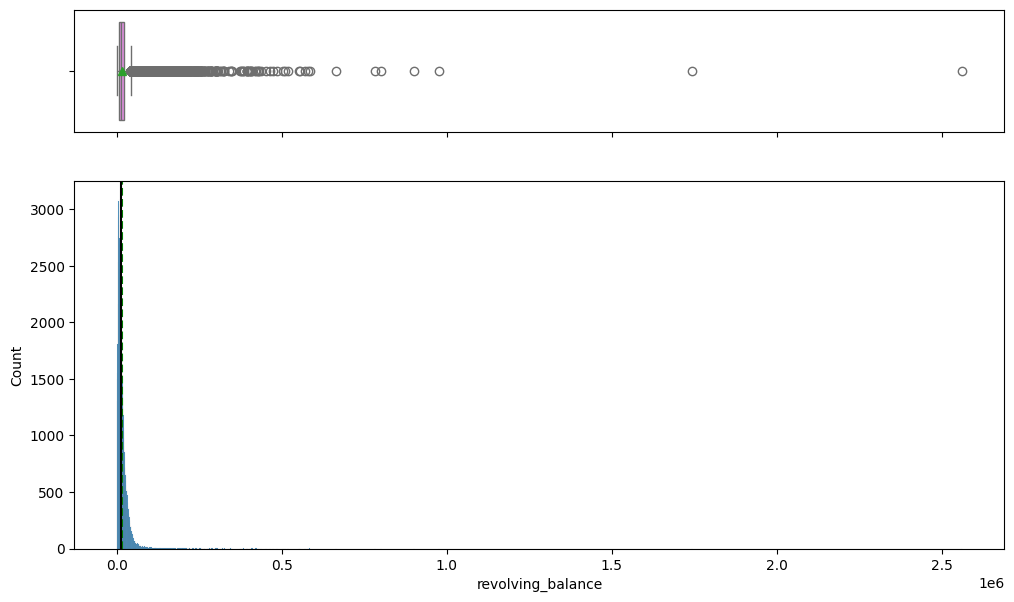

In [482]:
histogram_boxplot(df, 'revolving_balance')

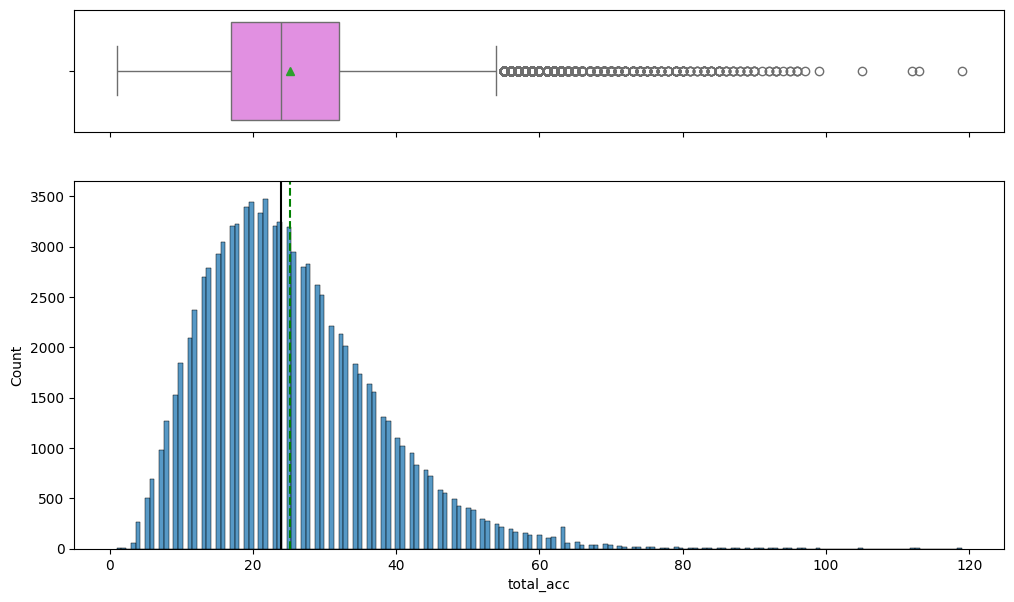

In [483]:
histogram_boxplot(df, 'total_acc')

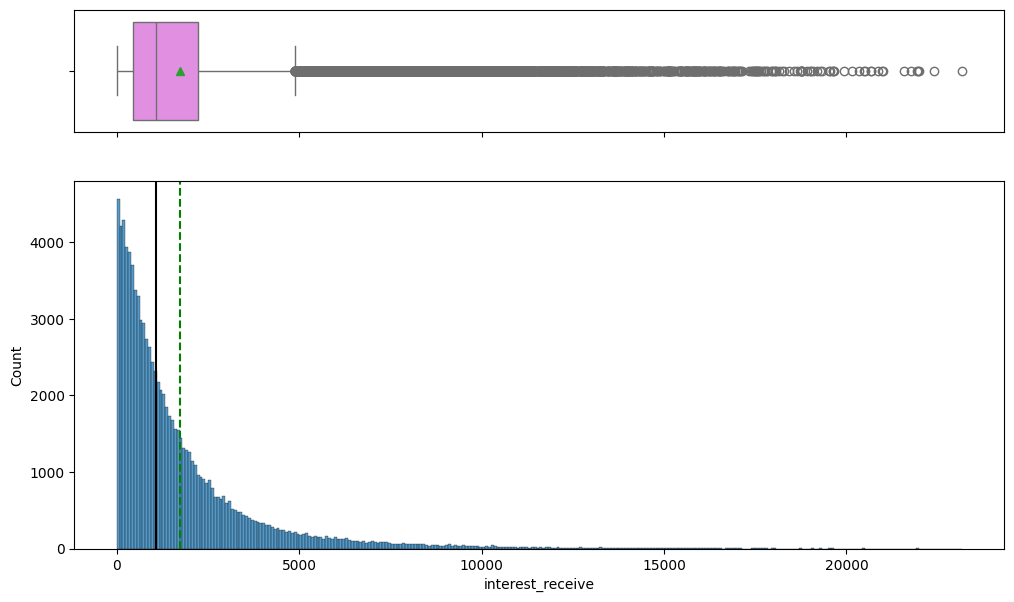

In [484]:
histogram_boxplot(df, 'interest_receive')

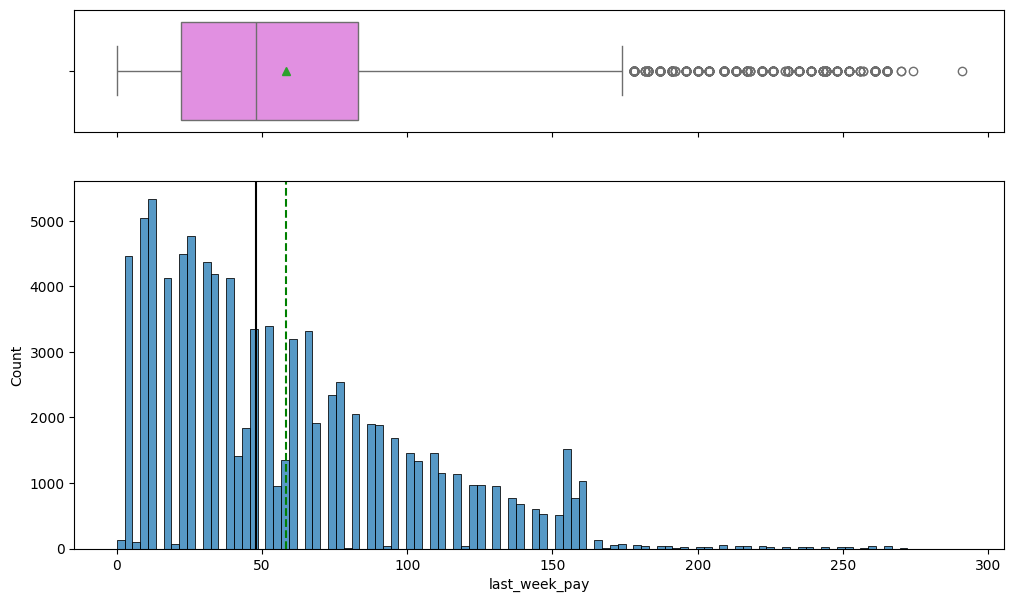

In [485]:
histogram_boxplot(df, 'last_week_pay')

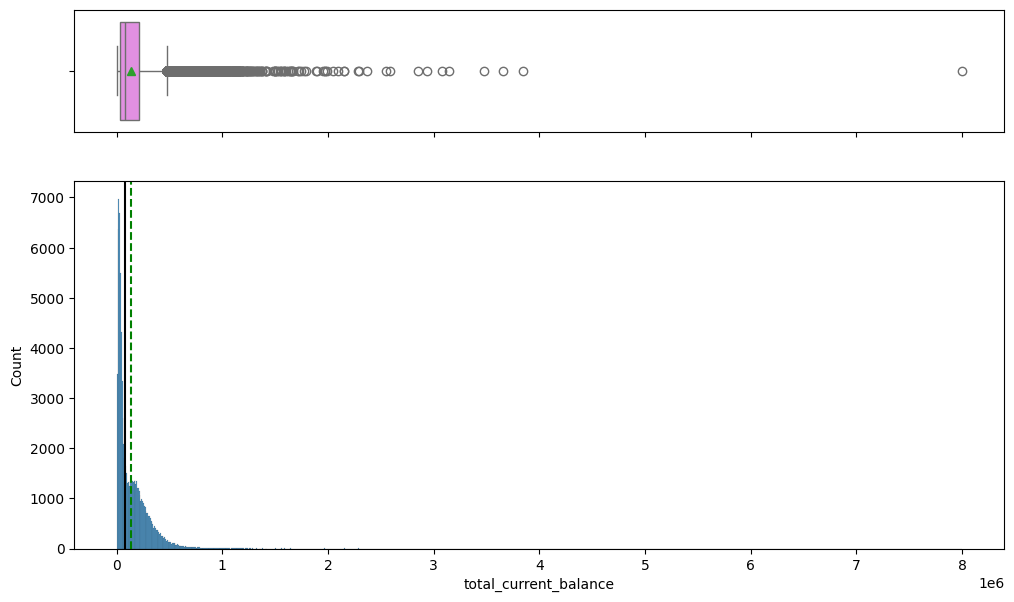

In [486]:
histogram_boxplot(df, 'total_current_balance')

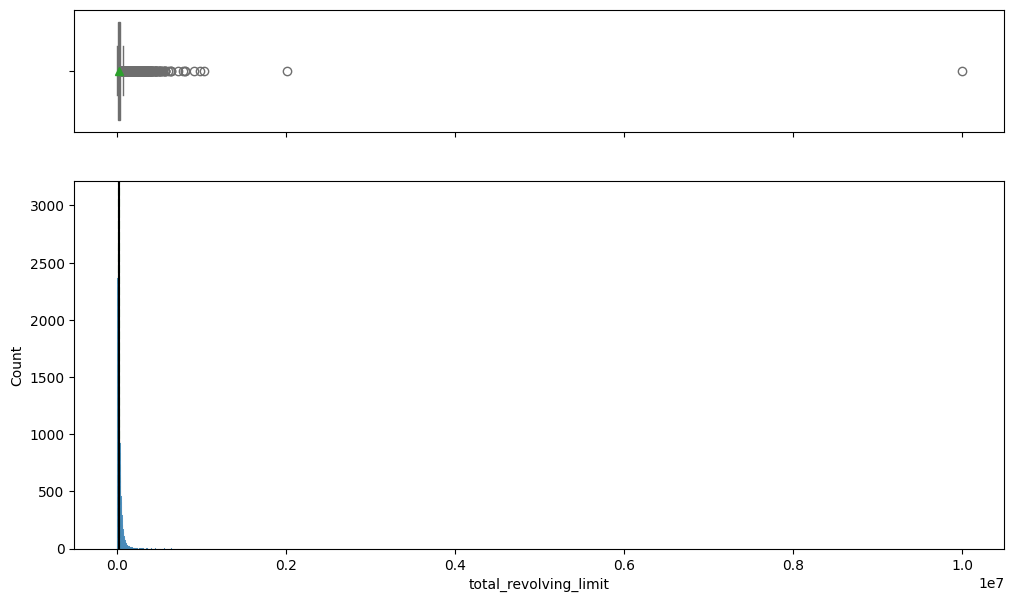

In [487]:
histogram_boxplot(df, 'total_revolving_limit')

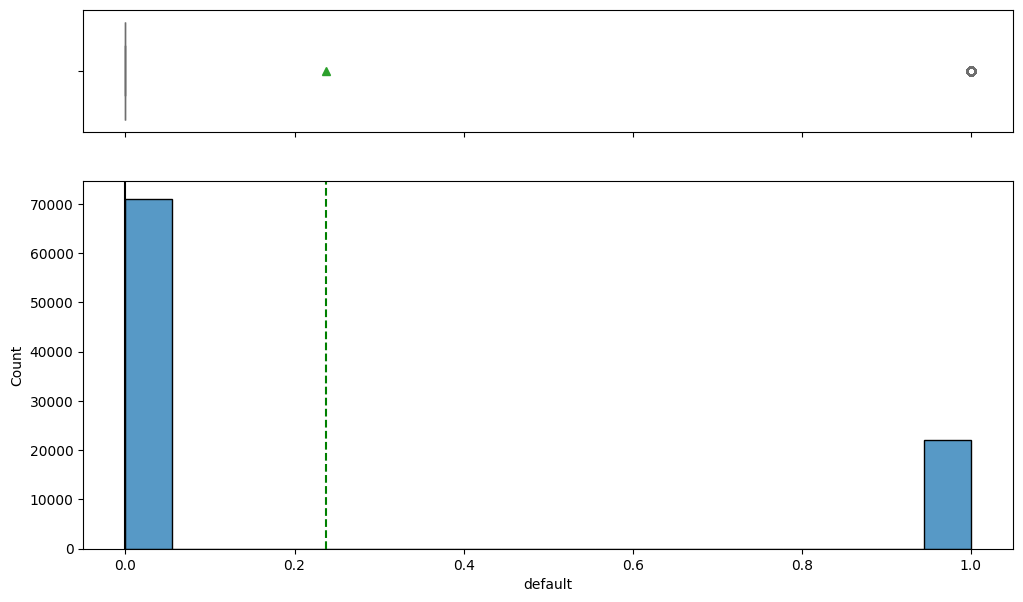

In [488]:
histogram_boxplot(df, 'default')

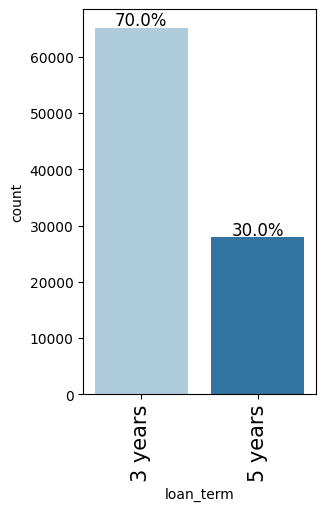

In [489]:
 labeled_barplot(df, "loan_term", perc=True)

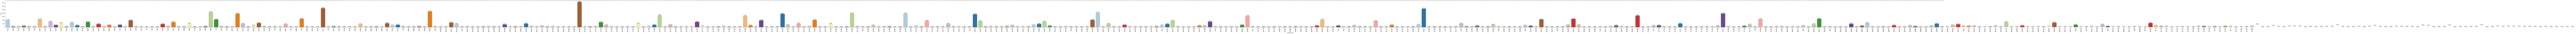

In [490]:
labeled_barplot(df, "interest_rate", perc=True)

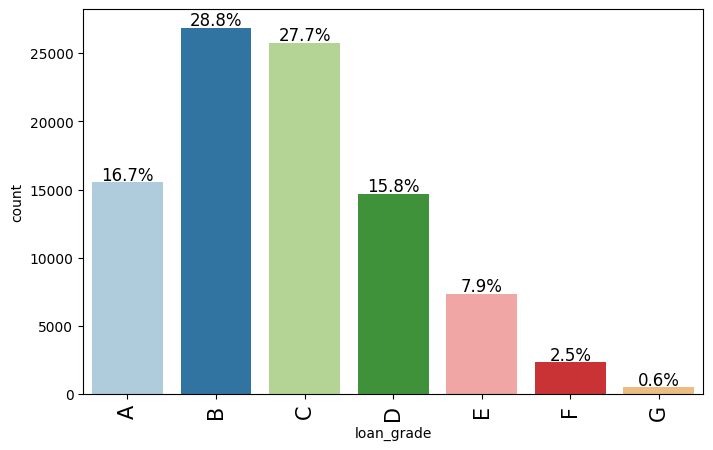

In [491]:
labeled_barplot(df, "loan_grade", perc=True)

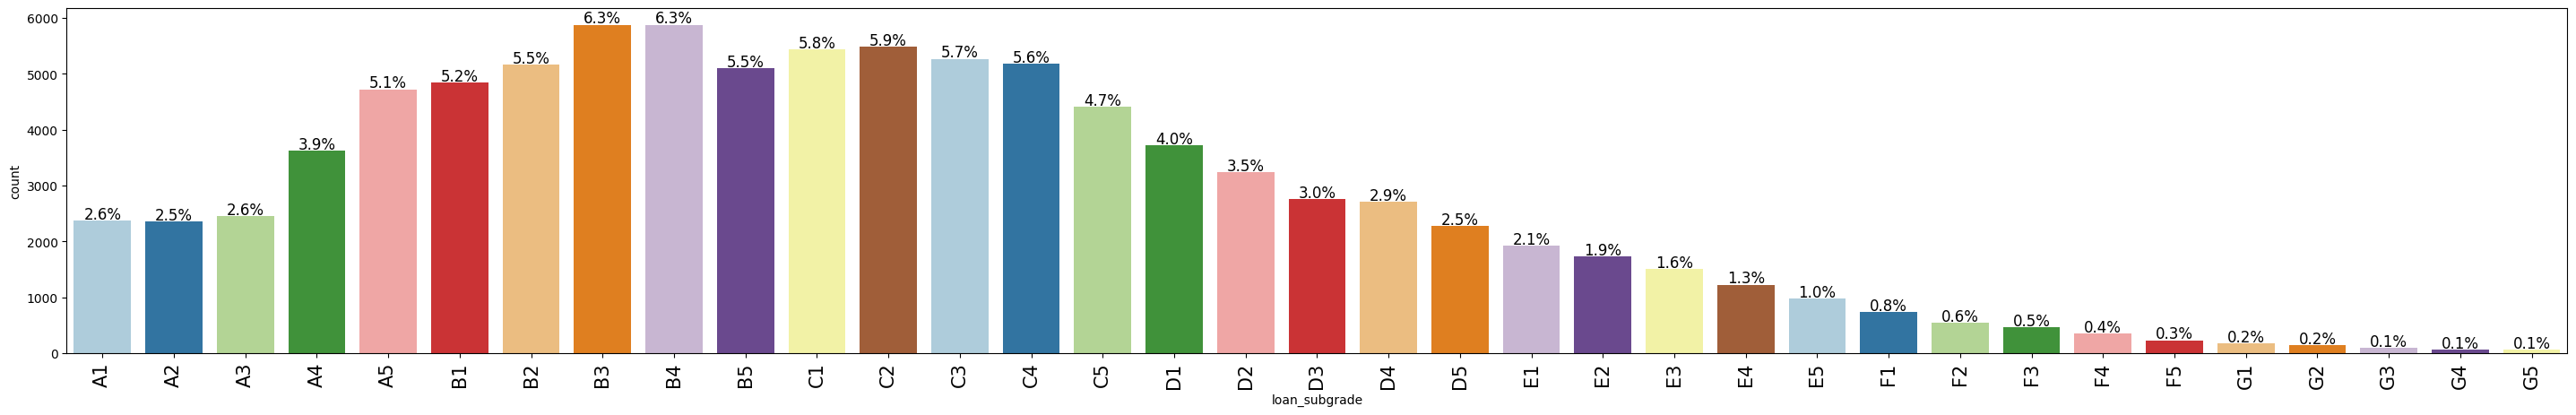

In [492]:
labeled_barplot(df, "loan_subgrade", perc=True)

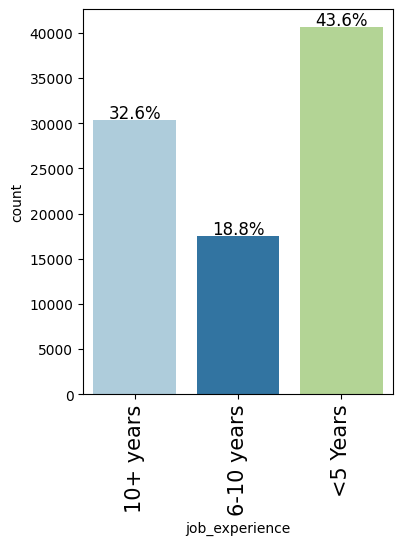

In [493]:
labeled_barplot(df, "job_experience", perc=True)

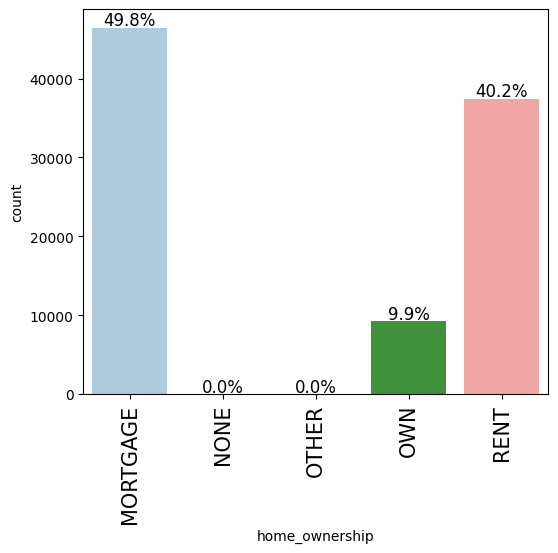

In [494]:
labeled_barplot(df, "home_ownership", perc=True)

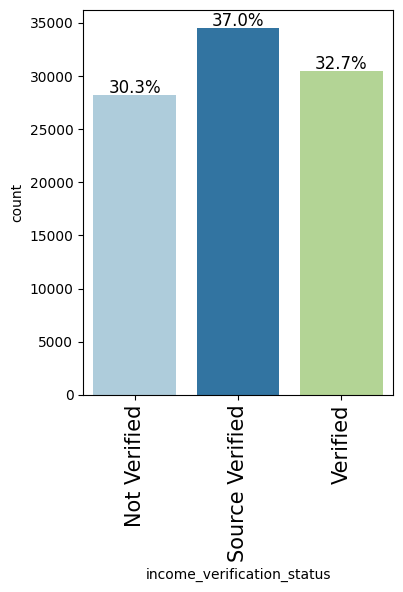

In [495]:
labeled_barplot(df, "income_verification_status", perc=True)

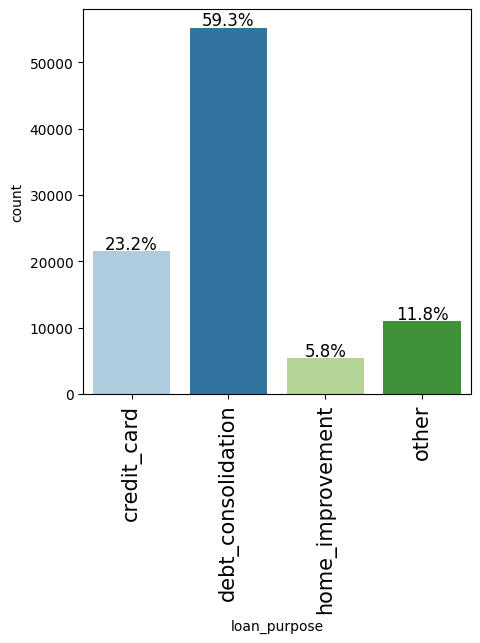

In [496]:
labeled_barplot(df, "loan_purpose", perc=True)

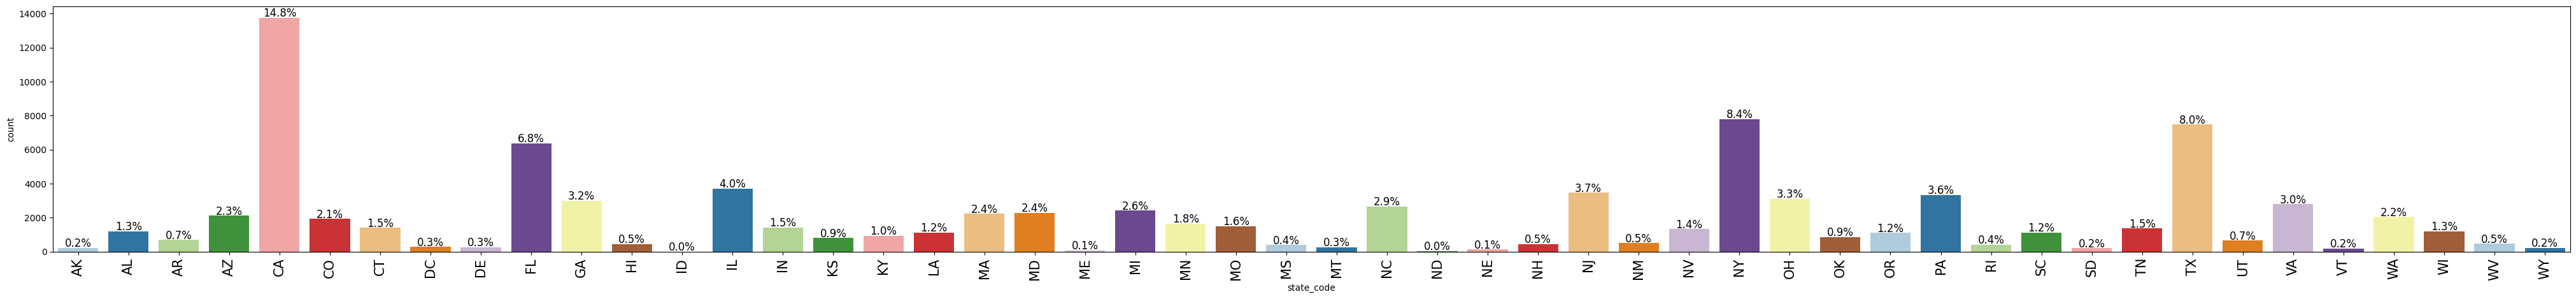

In [497]:
labeled_barplot(df, "state_code", perc=True)

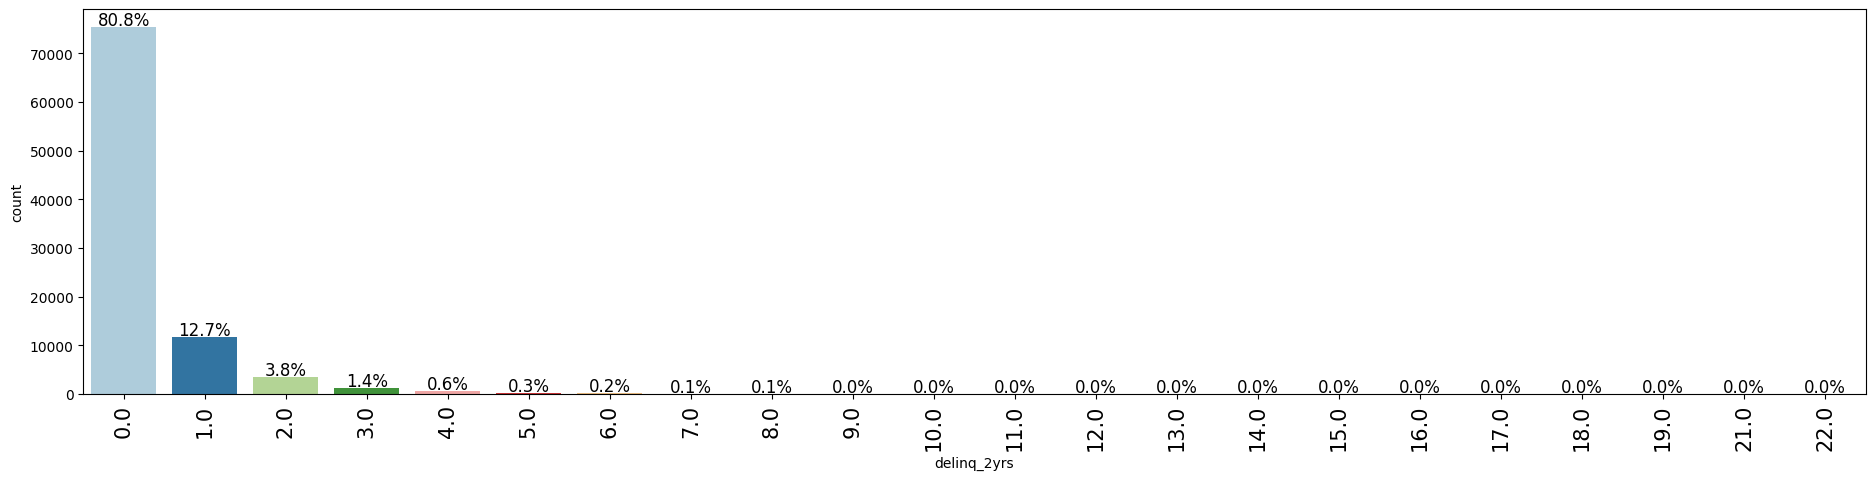

In [498]:
labeled_barplot(df, "delinq_2yrs", perc=True)

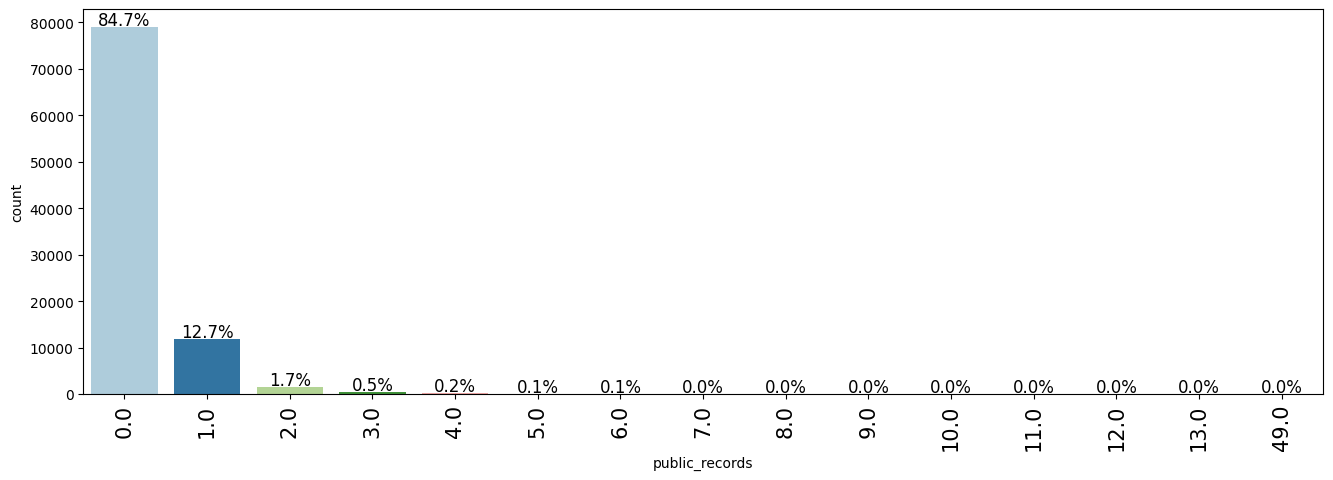

In [499]:
labeled_barplot(df, "public_records", perc=True)

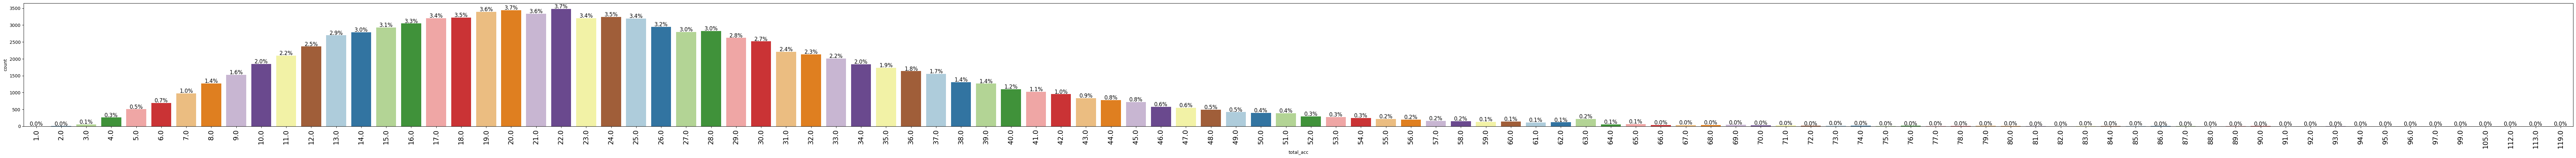

In [500]:
labeled_barplot(df, "total_acc", perc=True)

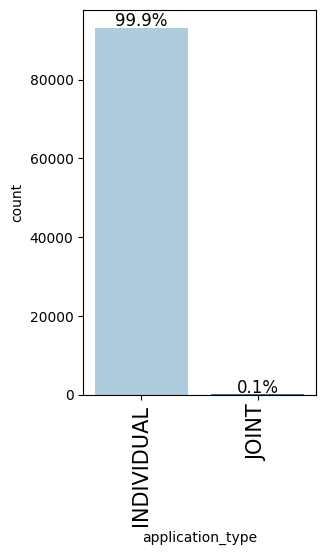

In [501]:
labeled_barplot(df, "application_type", perc=True)

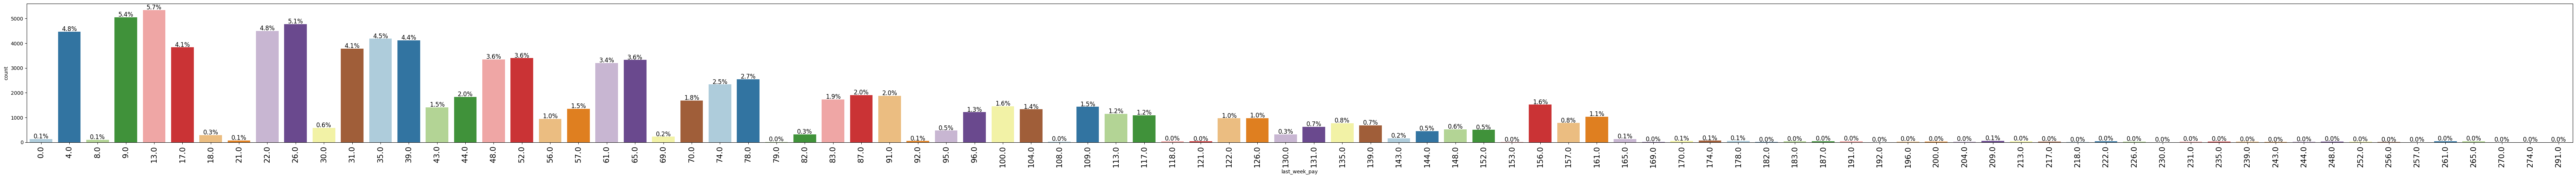

In [502]:
labeled_barplot(df, "last_week_pay", perc=True)

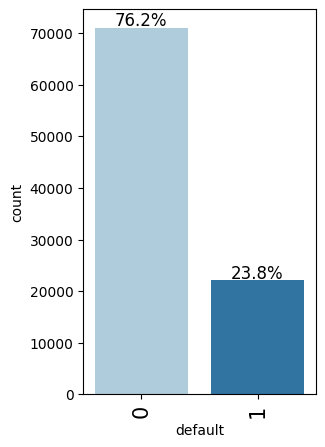

In [503]:
labeled_barplot(df, "default", perc=True)

### Bivariate Analysis

In [504]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

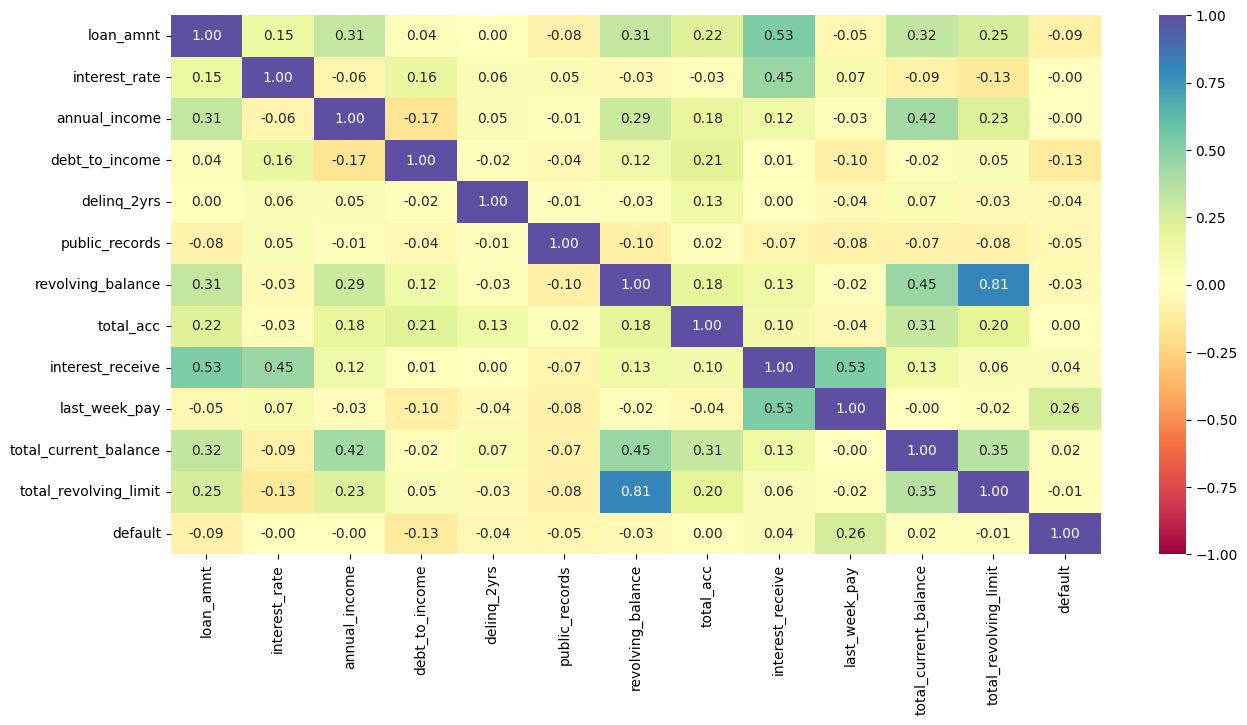

In [505]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot the heatmap for those columns
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


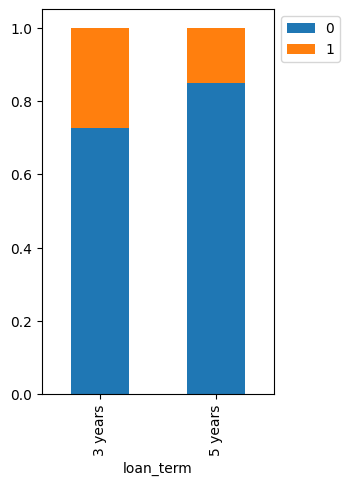

In [506]:
stacked_barplot(df, "loan_term", "default")

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


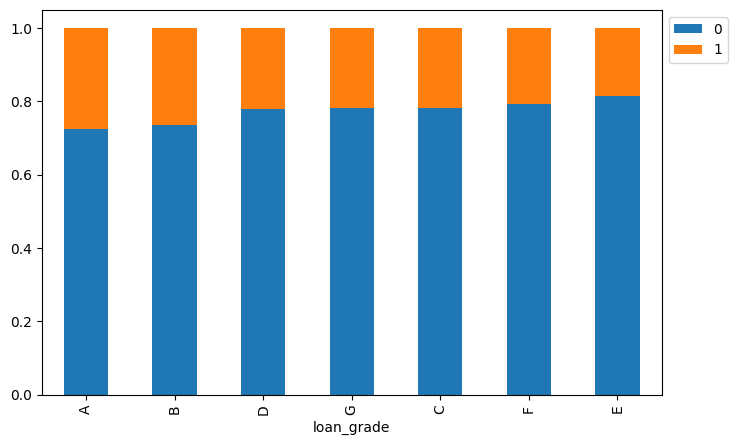

In [507]:
stacked_barplot(df, "loan_grade", "default")

default            0      1    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

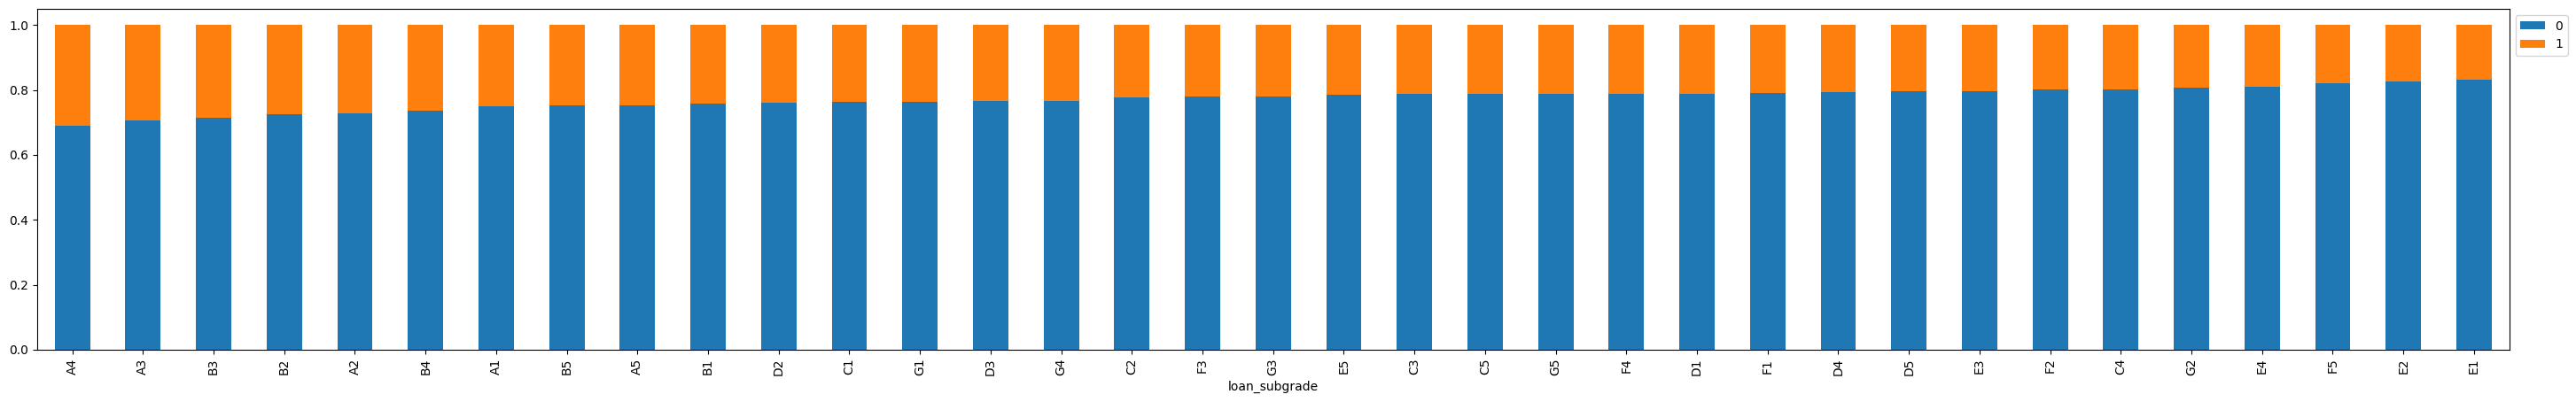

In [508]:
stacked_barplot(df, "loan_subgrade", "default")

default             0      1    All
job_experience                     
All             67140  21332  88472
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


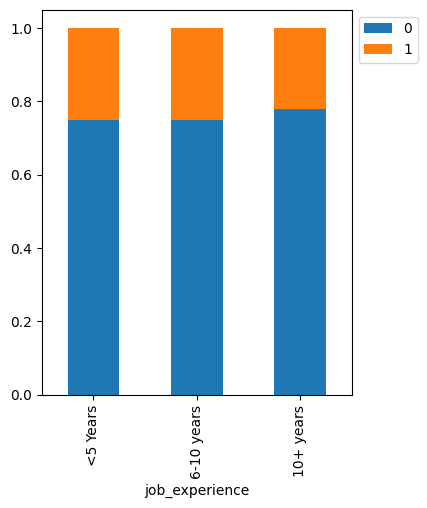

In [509]:
stacked_barplot(df, "job_experience", "default")

default             0      1    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


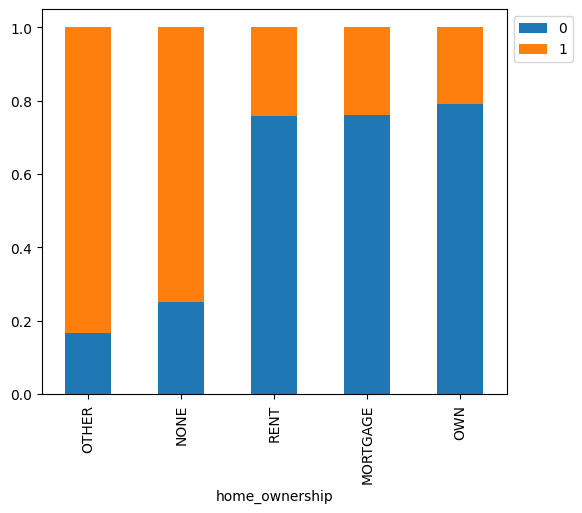

In [510]:
stacked_barplot(df, "home_ownership", "default")

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


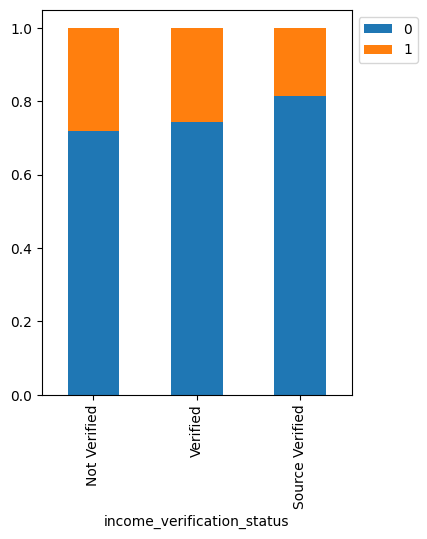

In [511]:
stacked_barplot(df, "income_verification_status", "default")

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


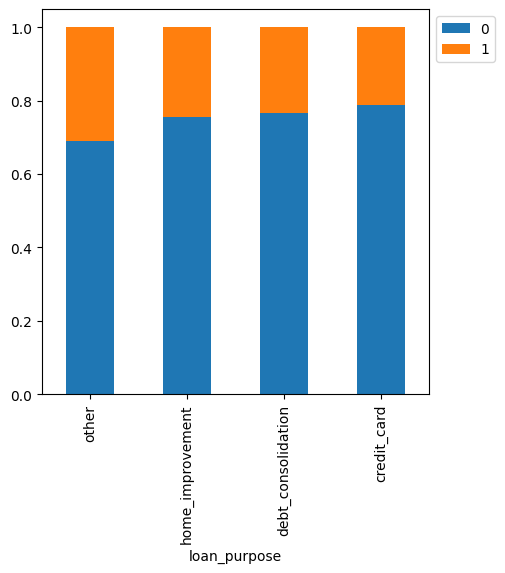

In [512]:
stacked_barplot(df, "loan_purpose", "default")

default         0      1    All
state_code                     
All         71045  22129  93174
CA           9905   3839  13744
NY           5886   1896   7782
TX           5748   1719   7467
FL           4876   1484   6360
IL           2864    835   3699
NJ           2640    824   3464
PA           2616    705   3321
GA           2324    674   2998
VA           2141    652   2793
OH           2467    637   3104
NC           2050    619   2669
MA           1648    584   2232
MD           1704    575   2279
AZ           1583    532   2115
WA           1517    521   2038
MI           1911    504   2415
CO           1431    493   1924
MN           1254    384   1638
NV            983    343   1326
MO           1144    341   1485
CT           1083    319   1402
OR            805    297   1102
AL            915    273   1188
WI            940    266   1206
SC            847    261   1108
LA            854    258   1112
IN           1188    232   1420
KY            731    202    933
TN      

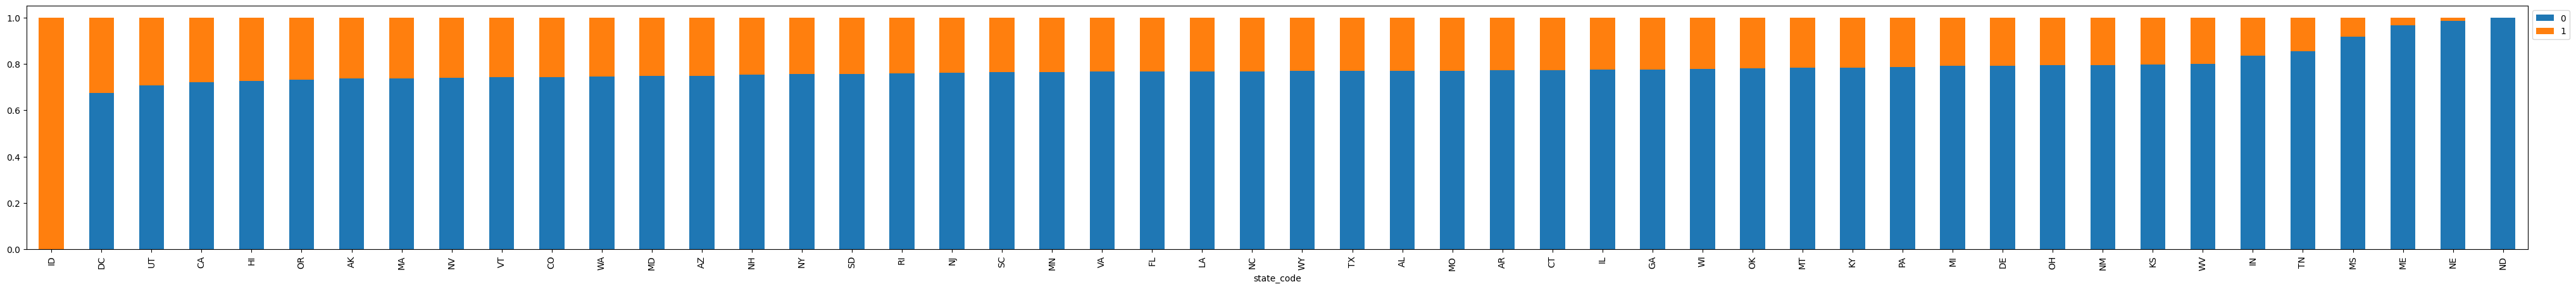

In [513]:
stacked_barplot(df, "state_code", "default")

default          0      1    All
delinq_2yrs                     
All          71045  22127  93172
0.0          56778  18537  75315
1.0           9345   2457  11802
2.0           2812    698   3510
3.0           1093    239   1332
4.0            446    103    549
5.0            223     45    268
6.0            124     18    142
7.0             73     11     84
8.0             51      7     58
9.0             31      4     35
12.0            12      3     15
10.0            17      2     19
13.0             8      1      9
16.0             1      1      2
22.0             0      1      1
14.0             7      0      7
15.0             2      0      2
17.0             2      0      2
18.0             3      0      3
19.0             1      0      1
21.0             1      0      1
11.0            15      0     15
------------------------------------------------------------------------------------------------------------------------


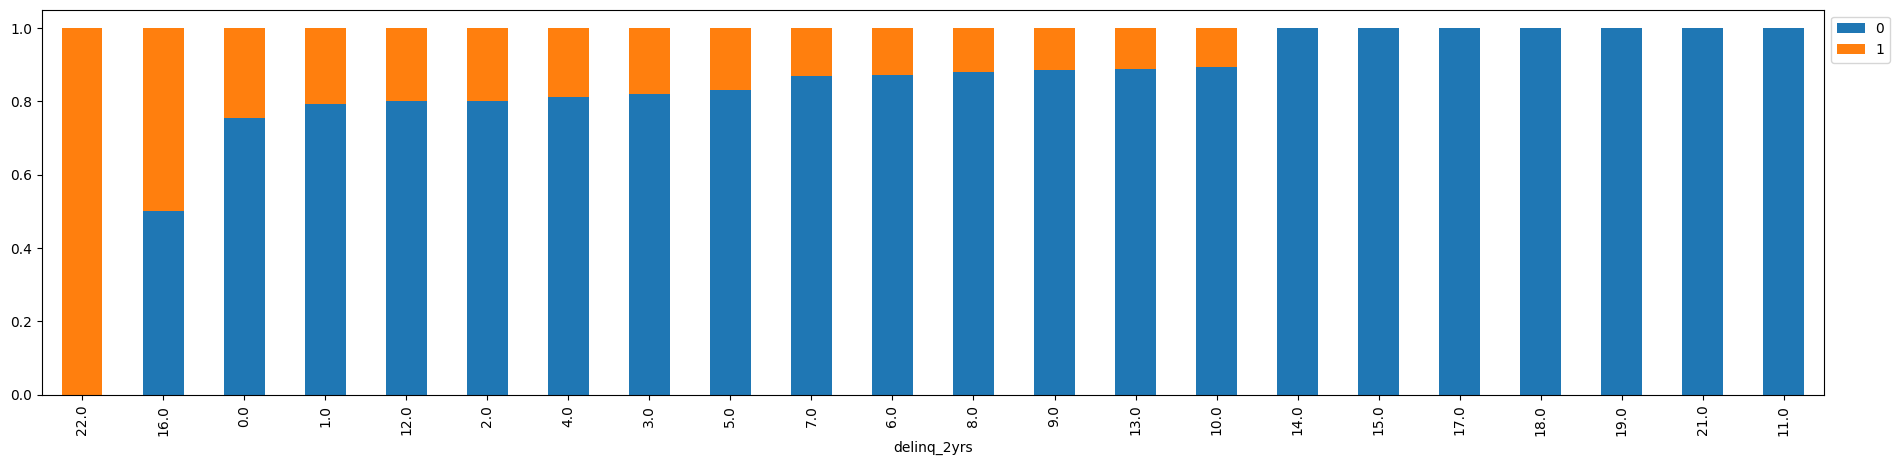

In [514]:
stacked_barplot(df, "delinq_2yrs", "default")

default             0      1    All
public_records                     
All             71045  22127  93172
0.0             59530  19404  78934
1.0              9439   2410  11849
2.0              1323    227   1550
3.0               420     59    479
4.0               163     11    174
5.0                75      9     84
6.0                46      4     50
7.0                21      1     22
8.0                10      1     11
9.0                 8      1      9
10.0                4      0      4
11.0                2      0      2
12.0                2      0      2
13.0                1      0      1
49.0                1      0      1
------------------------------------------------------------------------------------------------------------------------


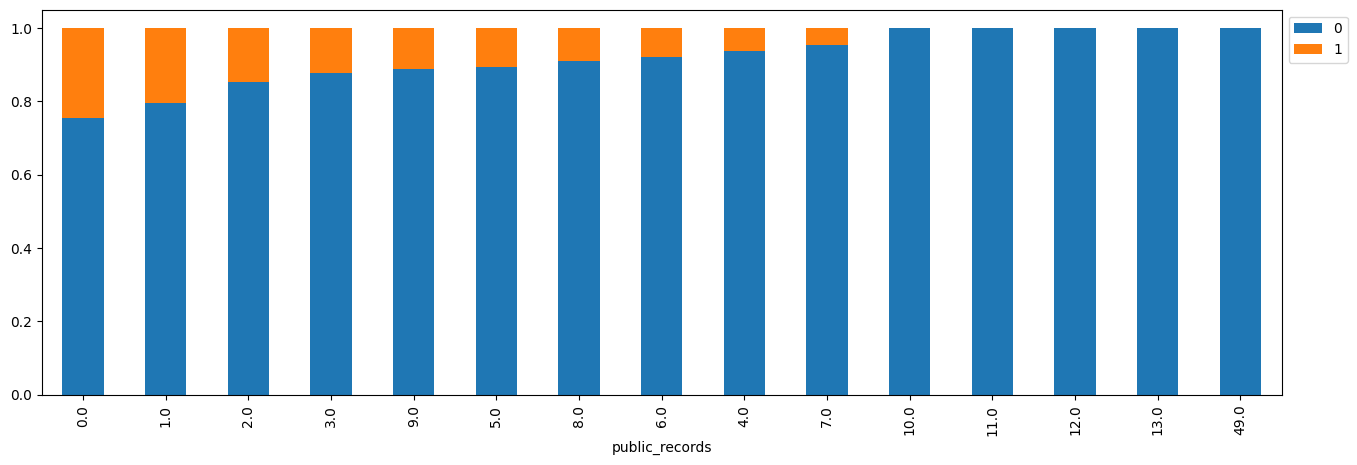

In [515]:
stacked_barplot(df, "public_records", "default")

default        0      1    All
total_acc                     
All        71045  22127  93172
22.0        2619    857   3476
20.0        2617    826   3443
19.0        2596    799   3395
18.0        2436    785   3221
...          ...    ...    ...
86.0           4      0      4
81.0           4      0      4
78.0           6      0      6
73.0          20      0     20
77.0           7      0      7

[103 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


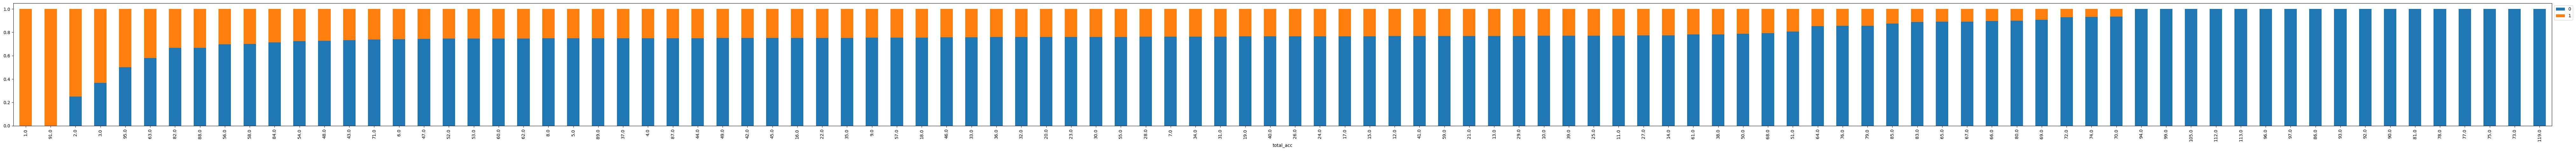

In [516]:
stacked_barplot(df, "total_acc", "default")

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


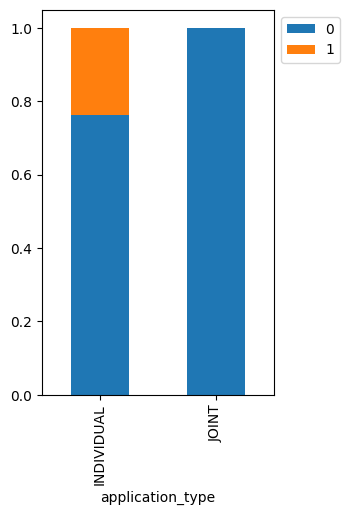

In [517]:
stacked_barplot(df, "application_type", "default")

default            0      1    All
last_week_pay                     
All            69121  22129  91250
156.0            109   1411   1520
161.0             71    957   1028
35.0            3339    846   4185
39.0            3334    788   4122
...              ...    ...    ...
192.0              1      2      3
270.0              0      2      2
256.0              4      1      5
274.0              0      1      1
291.0              0      1      1

[91 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


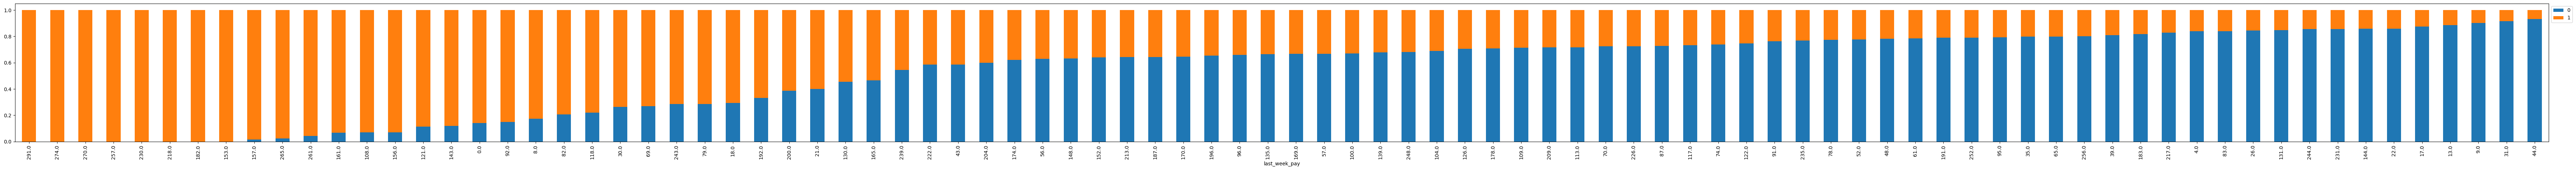

In [518]:
stacked_barplot(df, "last_week_pay", "default")

In [519]:
df.duplicated().sum()

0

In [520]:
df.isnull().sum().sort_values(ascending=False)

,0
total_revolving_limit,7386
total_current_balance,7386
job_experience,4702
last_week_pay,1924
delinq_2yrs,2
total_acc,2
public_records,2
annual_income,1
loan_amnt,0
application_type,0


In [521]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.select_dtypes(include='category').columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

In [522]:
cat_cols = dt.select_dtypes(include='object').columns
dt[cat_cols] = dt[cat_cols].astype('category')
dt.select_dtypes(include='category').columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

In [523]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in loan_term are :
loan_term
3 years    65211
5 years    27963
Name: count, dtype: int64
**************************************************
Unique values in loan_grade are :
loan_grade
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: count, dtype: int64
**************************************************
Unique values in loan_subgrade are :
loan_subgrade
B4    5879
B3    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64
**************************************************
Unique values in job_experience are :
job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
NaN            4702
N

In [524]:
for i in dt.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(dt[i].value_counts(dropna=False))
    print('*'*50)

Unique values in loan_term are :
loan_term
3 years    28110
5 years    11823
Name: count, dtype: int64
**************************************************
Unique values in loan_grade are :
loan_grade
B    11551
C    10948
A     6764
D     6237
E     3158
F     1030
G      245
Name: count, dtype: int64
**************************************************
Unique values in loan_subgrade are :
loan_subgrade
B3    2547
B4    2519
C1    2436
C2    2371
B5    2247
C3    2220
B2    2206
C4    2084
A5    2069
B1    2032
C5    1837
D1    1576
A4    1559
D2    1373
D3    1175
D4    1141
A3    1074
A1    1067
A2     995
D5     972
E1     803
E2     755
E3     652
E4     519
E5     429
F1     312
F2     254
F3     195
F4     147
F5     122
G2      72
G1      71
G3      46
G5      31
G4      25
Name: count, dtype: int64
**************************************************
Unique values in job_experience are :
job_experience
<5 Years      17290
10+ years     13146
6-10 years     7408
NaN            2089
N

In [525]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Loop through the numeric columns and print value counts, including NaN
for col in numeric_cols:
    print(f"Value counts for column {col}:")
    # Get value counts including NaN
    value_counts = df[col].value_counts(dropna=False)
    # Add NaN count separately
    nan_count = df[col].isnull().sum()
    # Print value counts
    print(value_counts)
    # Print NaN count
    print(f"NaN count: {nan_count}")
    print('*' * 50)

Value counts for column loan_amnt:
loan_amnt
10000    6527
12000    5373
15000    4976
20000    4966
35000    3833
         ... 
34175       1
31650       1
32275       1
30975       1
31425       1
Name: count, Length: 1310, dtype: int64
NaN count: 0
**************************************************
Value counts for column interest_rate:
interest_rate
10.99    3609
9.17     2713
15.61    2637
9.99     2242
7.89     2141
         ... 
18.04       1
7.75        1
15.51       1
21.64       1
18.36       1
Name: count, Length: 481, dtype: int64
NaN count: 0
**************************************************
Value counts for column annual_income:
annual_income
60000.00     3644
50000.00     3273
65000.00     2683
40000.00     2562
70000.00     2509
             ... 
21708.00        1
33712.00        1
115137.00       1
35416.56        1
148531.50       1
Name: count, Length: 8668, dtype: int64
NaN count: 1
**************************************************
Value counts for column debt_to_

In [526]:
numeric_cols = dt.select_dtypes(include=['float', 'int']).columns

# Loop through the numeric columns and print value counts, including NaN
for col in numeric_cols:
    print(f"Value counts for column {col}:")
    # Get value counts including NaN
    value_counts = dt[col].value_counts(dropna=False)
    # Add NaN count separately
    nan_count = dt[col].isnull().sum()
    # Print value counts
    print(value_counts)
    # Print NaN count
    print(f"NaN count: {nan_count}")
    print('*' * 50)

Value counts for column ID:
ID
4855329     1
45240882    1
43857745    1
6518996     1
24715576    1
           ..
67770427    1
59771911    1
7410607     1
11669322    1
21810584    1
Name: count, Length: 39933, dtype: int64
NaN count: 0
**************************************************
Value counts for column loan_amnt:
loan_amnt
10000    2814
12000    2228
15000    2198
20000    2096
35000    1604
         ... 
2225        1
25925       1
34900       1
19225       1
34975       1
Name: count, Length: 1223, dtype: int64
NaN count: 0
**************************************************
Value counts for column interest_rate:
interest_rate
10.99    1541
9.17     1183
15.61    1101
9.99     1005
7.89      916
         ... 
11.41       1
14.12       1
9.20        1
19.13       1
16.70       1
Name: count, Length: 430, dtype: int64
NaN count: 0
**************************************************
Value counts for column annual_income:
annual_income
60000.00    1546
50000.00    1320
65000.00  

In [527]:
df.annual_income.fillna(df.annual_income.mean(), inplace=True)
df.last_week_pay.fillna(df.last_week_pay.mean(), inplace=True)
df.total_current_balance.fillna(df.total_current_balance.mean(), inplace=True)
df.total_revolving_limit.fillna(df.total_revolving_limit.mean(), inplace=True)
df.total_acc.fillna(df.total_acc.mean(), inplace=True)

In [528]:
dt.annual_income.fillna(df.annual_income.mean(), inplace=True)
dt.last_week_pay.fillna(df.last_week_pay.mean(), inplace=True)
dt.total_current_balance.fillna(df.total_current_balance.mean(), inplace=True)
dt.total_revolving_limit.fillna(df.total_revolving_limit.mean(), inplace=True)
dt.total_acc.fillna(df.total_acc.mean(), inplace=True)

In [529]:
df.isnull().sum().sort_values(ascending=False)

,0
job_experience,4702
delinq_2yrs,2
public_records,2
loan_amnt,0
total_revolving_limit,0
total_current_balance,0
last_week_pay,0
application_type,0
interest_receive,0
total_acc,0


In [530]:
dt.isnull().sum().sort_values(ascending=False)

,0
job_experience,2089
public_records,1
delinq_2yrs,1
ID,0
debt_to_income,0
total_current_balance,0
last_week_pay,0
application_type,0
interest_receive,0
total_acc,0


# Missing value

In [531]:
df.annual_income.fillna(df.annual_income.mean(), inplace=True)
df.last_week_pay.fillna(df.last_week_pay.mean(), inplace=True)
df.total_current_balance.fillna(df.total_current_balance.mean(), inplace=True)
df.total_revolving_limit.fillna(df.total_revolving_limit.mean(), inplace=True)
df.total_acc.fillna(df.total_acc.mean(), inplace=True)

In [532]:
dt.annual_income.fillna(df.annual_income.mean(), inplace=True)
dt.last_week_pay.fillna(df.last_week_pay.mean(), inplace=True)
dt.total_current_balance.fillna(df.total_current_balance.mean(), inplace=True)
dt.total_revolving_limit.fillna(df.total_revolving_limit.mean(), inplace=True)
dt.total_acc.fillna(df.total_acc.mean(), inplace=True)

In [533]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


# Encoding of Ordinal Categories

In [534]:
df['job_experience'].value_counts()

,count
job_experience,
<5 Years,40610
10+ years,30362
6-10 years,17500


In [535]:
job_experience = {'<5 Years':0, '6-10 years':1, '10+ years':2}
df['job_experience'] = df['job_experience'].map(job_experience).astype('Int32')
dt['job_experience'] = dt['job_experience'].map(job_experience).astype('Int32')

In [536]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.17,B,B2,0,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,3 years,13.65,C,C1,0,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,3 years,7.26,A,A4,0,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,3 years,13.99,C,C4,<NA>,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,3 years,6.39,A,A2,2,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [537]:
df['loan_term'].value_counts()

,count
loan_term,
3 years,65211
5 years,27963


In [538]:
loan_term = {'3 years': 0, '5 years': 1}
df['loan_term'] = df['loan_term'].map(loan_term).astype('Int32')
dt['loan_term'] = dt['loan_term'].map(loan_term).astype('Int32')

In [539]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,B,B2,0,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,C,C1,0,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,A,A4,0,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,C,C4,<NA>,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,A,A2,2,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [540]:
df['loan_grade'].value_counts()

,count
loan_grade,
B,26865
C,25787
A,15534
D,14715
E,7378
F,2344
G,551


In [541]:
loan_grade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df['loan_grade'] = df['loan_grade'].map(loan_grade).astype('Int32')
dt['loan_grade'] = dt['loan_grade'].map(loan_grade).astype('Int32')

In [542]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,B2,0,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,C1,0,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,A4,0,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,C4,<NA>,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,A2,2,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [543]:
df['loan_subgrade'].value_counts()

,count
loan_subgrade,
B4,5879
B3,5879
C2,5479
C1,5443
C3,5270
C4,5182
B2,5169
B5,5095
B1,4843


In [544]:
# Sort the 'loan_subgrade' column based on letter and number
sorted_loan_subgrade = df['loan_subgrade'].sort_values(key=lambda col: col.str.extract(r'([A-Z]+)(\d+)').apply(lambda x: (x[0], int(x[1])), axis=1))

# Display the sorted column
print(sorted_loan_subgrade)


82621    A1
57493    A1
24953    A1
16402    A1
39570    A1
         ..
5526     G5
61075    G5
61020    G5
10106    G5
44453    G5
Name: loan_subgrade, Length: 93174, dtype: category
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']


In [545]:
loan_subgrade = {'A1':0,  'A2':1,  'A3':2,  'A4':3,  'A5':4,
                 'B1':5,  'B2':6,  'B3':7,  'B4':8,  'B5':9,
                 'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
                 'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
                 'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
                 'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
                 'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}

df['loan_subgrade'] = df['loan_subgrade'].map(loan_subgrade).astype('Int32')
dt['loan_subgrade'] = dt['loan_subgrade'].map(loan_subgrade).astype('Int32')

In [546]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,OWN,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,OWN,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,MORTGAGE,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,MORTGAGE,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,MORTGAGE,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [547]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,46445
RENT,37449
OWN,9254
OTHER,18
NONE,8


In [548]:
home_ownership = {'MORTGAGE':0, 'RENT':1, 'OWN':2, 'OTHER':3, 'NONE':4}
df['home_ownership'] = df['home_ownership'].map(home_ownership).astype('Int32')
dt['home_ownership'] = dt['home_ownership'].map(home_ownership).astype('Int32')

In [549]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,2,85000.0,Not Verified,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,2,64000.0,Verified,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,0,150000.0,Source Verified,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,0,59800.0,Verified,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,0,72000.0,Source Verified,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [550]:
df['income_verification_status'].value_counts()

,count
income_verification_status,
Source Verified,34487
Verified,30450
Not Verified,28237


In [551]:
income_verification_status = {'Verified':0, 'Not Verified':1, 'Source Verified':2}
df['income_verification_status'] = df['income_verification_status'].map(income_verification_status).astype('Int32')
dt['income_verification_status'] = dt['income_verification_status'].map(income_verification_status).astype('Int32')




In [552]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,2,85000.0,1,debt_consolidation,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,2,64000.0,0,debt_consolidation,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,0,150000.0,2,debt_consolidation,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,0,59800.0,0,debt_consolidation,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,0,72000.0,2,credit_card,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [553]:
df['loan_purpose'].value_counts()

,count
loan_purpose,
debt_consolidation,55241
credit_card,21571
other,10971
home_improvement,5391


In [554]:
loan_purpose = {'debt_consolidation': 0, 'credit_card':1, 'home_improvement': 2, 'other': 3}
df['loan_purpose'] = df['loan_purpose'].map(loan_purpose).astype('Int32')
dt['loan_purpose'] = dt['loan_purpose'].map(loan_purpose).astype('Int32')

In [555]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,2,85000.0,1,0,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,2,64000.0,0,0,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,0,150000.0,2,0,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,0,59800.0,0,0,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,0,72000.0,2,1,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [556]:
df['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,93118
JOINT,56


In [557]:
application_type = {'INDIVIDUAL': 0, 'JOINT':1}
df['application_type'] = df['application_type'].map(application_type).astype('Int32')
dt['application_type'] = dt['application_type'].map(application_type).astype('Int32')

In [558]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,2,85000.0,1,0,...,0.0,0.0,39519,20.0,59.60,0,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,2,64000.0,0,0,...,0.0,1.0,9783,24.0,3348.25,0,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,0,150000.0,2,0,...,2.0,0.0,13641,27.0,276.69,0,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,0,59800.0,0,0,...,0.0,0.0,35020,35.0,1106.72,0,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,0,72000.0,2,1,...,0.0,0.0,23990,26.0,725.29,0,39.0,23990.0,81300.0,0


In [559]:
df['state_code'].value_counts()

,count
state_code,
CA,13744
NY,7782
TX,7467
FL,6360
IL,3699
NJ,3464
PA,3321
OH,3104
GA,2998


In [560]:
# Get unique state codes and sort them
unique_sorted_state_codes = pd.Series(df['state_code'].unique()).sort_values()

# Convert to DataFrame
unique_sorted_state_codes_df = unique_sorted_state_codes.reset_index(drop=True)

# Display the sorted unique state codes as a DataFrame
print(unique_sorted_state_codes_df)

0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    KS
16    KY
17    LA
18    MA
19    MD
20    ME
21    MI
22    MN
23    MO
24    MS
25    MT
26    NC
27    ND
28    NE
29    NH
30    NJ
31    NM
32    NV
33    NY
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VA
45    VT
46    WA
47    WI
48    WV
49    WY
dtype: category
Categories (50, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']


In [561]:
state_code = {
    'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6,
    'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'ID': 12, 'IL': 13,
    'IN': 14, 'KS': 15, 'KY': 16, 'LA': 17, 'MA': 18, 'MD': 19,
    'ME': 20, 'MI': 21, 'MN': 22, 'MO': 23, 'MS': 24, 'MT': 25,
    'NC': 26, 'ND': 27, 'NE': 28, 'NH': 29, 'NJ': 30, 'NM': 31,
    'NV': 32, 'NY': 33, 'OH': 34, 'OK': 35, 'OR': 36, 'PA': 37,
    'RI': 38, 'SC': 39, 'SD': 40, 'TN': 41, 'TX': 42, 'UT': 43,
    'VA': 44, 'VT': 45, 'WA': 46, 'WI': 47, 'WV': 48, 'WY': 49
}
df['state_code'] = df['state_code'].map(state_code).astype('Int32')
dt['state_code'] = dt['state_code'].map(state_code).astype('Int32')

In [562]:
df.head()

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,0,9.17,1,6,0,2,85000.0,1,0,...,0.0,0.0,39519,20.0,59.60,0,4.0,95493.0,84100.0,0
1,18000,0,13.65,2,10,0,2,64000.0,0,0,...,0.0,1.0,9783,24.0,3348.25,0,95.0,185433.0,13500.0,0
2,16000,0,7.26,0,3,0,0,150000.0,2,0,...,2.0,0.0,13641,27.0,276.69,0,13.0,180519.0,19300.0,0
3,25000,0,13.99,2,13,<NA>,0,59800.0,0,0,...,0.0,0.0,35020,35.0,1106.72,0,17.0,183208.0,55400.0,0
4,17000,0,6.39,0,1,2,0,72000.0,2,1,...,0.0,0.0,23990,26.0,725.29,0,39.0,23990.0,81300.0,0


In [563]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [564]:
X = df.drop(['default'], axis=1)
y = df['default']

In [565]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)
# print(X_train.shape, X_test.shape)

In [566]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)
print(X_train.shape, X_val.shape)

(65221, 21) (27953, 21)


In [567]:
dt.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,0,15.31,2,11,0,0,73400.0,1,...,14.62,0.0,0.0,22156,30.0,2290.24,0,87.0,128098.0,25800.0
1,66862420,12000,0,7.26,0,3,2,0,105000.0,1,...,11.38,0.0,0.0,7592,14.0,202.68,0,13.0,269396.0,23600.0
2,3637416,15000,0,14.33,2,10,1,0,50000.0,0,...,28.15,0.0,1.0,17983,19.0,1166.24,0,30.0,220135.0,34100.0
3,53682249,12000,0,9.99,1,7,1,1,37000.0,2,...,34.32,0.0,0.0,12262,18.0,635.06,0,35.0,39436.0,21700.0
4,53937165,20150,0,11.53,1,9,0,1,75000.0,2,...,26.74,1.0,0.0,8251,11.0,1232.84,0,31.0,52764.0,12000.0


In [568]:
X_test = dt.drop(['ID'], axis=1)  # Assuming 'ID' is the column to drop

# Step 2: Impute missing values
imputer = KNNImputer(n_neighbors=5)  # Use the same imputer you fit on X_train
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

# Step 3: Convert categorical columns if necessary
cat_cols = X_test.select_dtypes(include='object').columns
X_test[cat_cols] = X_test[cat_cols].astype('category')

# Step 4: Scale the features if scaling was applied to the training data
scaler = StandardScaler()  # or the scaler you used for X_train
X_test_scaled = scaler.fit_transform(X_test)  # or use transform if you saved the scaler


In [569]:
print(X_test_scaled[:5])

[[-0.33009886 -0.648535    0.47602837  0.16123782  0.0137131  -1.01469472
  -0.90210833 -0.03297266 -0.04747524 -0.6959856  -1.24524314 -0.41247705
  -0.36541774 -0.34334392  0.19658758  0.40237017  0.25078351 -0.02452281
   0.6493469  -0.08171879 -0.11173023]
 [-0.33009886 -0.648535   -1.35682688 -1.36163589 -1.21720623  1.2775643
  -0.90210833  0.52576601 -0.04747524  0.28852708  1.46018044 -0.79419755
  -0.36541774 -0.34334392 -0.36079186 -0.95722529 -0.74546678 -0.02452281
  -1.03153739  0.85958776 -0.14884149]
 [ 0.02586846 -0.648535    0.25289816  0.16123782 -0.14015182  0.13143479
  -0.90210833 -0.44672218 -1.24358159 -0.6959856   1.32490927  1.1815595
  -0.36541774  1.44938003  0.03688253 -0.53235171 -0.28562518 -0.02452281
  -0.6453883   0.53141821  0.02828042]
 [-0.33009886 -0.648535   -0.73524989 -0.60019903 -0.60174656  0.13143479
   0.60378131 -0.67658303  1.14863112  0.28852708  0.51328219  1.90847787
  -0.36541774 -0.34334392 -0.1820661  -0.61732642 -0.53912124 -0.024522

In [570]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [571]:
# Transform the validation set using the same imputer
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

In [572]:
print(X_train.isna().sum())

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64


In [573]:
print(X_val.isna().sum())

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64


# Encoding categorical variables

In [574]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
print(X_train.shape, X_val.shape)

(65221, 21) (27953, 21)


In [575]:
from sklearn.preprocessing import StandardScaler

# Step 1: Instantiate the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Use the same scaler to transform the test set
X_val_scaled = scaler.transform(X_val)

# After this, you can use X_train_scaled and X_test_scaled for training your neural network model.


In [576]:
print(X_train_scaled[:5])

[[ 1.55797201e+00 -6.52185854e-01  5.90224231e-01  1.61916488e-01
   1.67232828e-01  1.41454101e-01 -9.07630837e-01 -2.00400013e-01
  -1.24858209e+00  2.96017895e-01  1.11470455e+00  1.30783570e+00
  -3.60855153e-01 -3.31255486e-01  8.08098192e-01  1.50060574e+00
   1.69872325e+00 -2.24995142e-02  4.50821574e-01  3.35873969e-01
   4.93356624e-01]
 [ 7.44729607e-01  1.53330526e+00  8.87727449e-01  1.61916488e-01
   4.76754864e-01 -1.00605926e+00 -9.07630837e-01  1.17642599e+00
   1.14726876e+00 -6.88861110e-01 -1.25315924e+00 -5.80467200e-01
  -3.60855153e-01 -3.31255486e-01  1.24184090e+00  1.16291617e+00
   2.23726577e+00 -2.24995142e-02  1.15678161e+00 -1.88161554e-01
   5.23171167e-01]
 [-3.89060899e-01 -6.52185854e-01  1.14861489e+00  9.27770085e-01
   1.25055995e+00 -1.00605926e+00  5.98298869e-01 -6.38481013e-01
   1.14726876e+00 -6.88861110e-01  1.31766431e+00  2.17963839e+00
  -3.60855153e-01 -3.31255486e-01 -5.98714833e-02  4.87537024e-01
   1.54188631e-01 -2.24995142e-02  6.3

In [577]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [578]:
train_metric_df = pd.DataFrame(columns=["accuracy"])
valid_metric_df = pd.DataFrame(columns=["accuracy"])

In [579]:
import matplotlib.pyplot as plt

# Function to plot metrics
def plot(history, name):
    """
    Function to plot loss/recall

    history: an object which stores the metrics and losses.
    name: can be one of 'loss', 'recall', or 'accuracy'
    """
    fig, ax = plt.subplots()  # Creating a subplot with figure and axes.
    plt.plot(history.history[name])  # Plotting the train metric
    plt.plot(history.history['val_' + name])  # Plotting the validation metric

    plt.title('Model ' + name.capitalize())  # Defining the title of the plot.
    plt.ylabel(name.capitalize())  # Capitalizing the first letter.
    plt.xlabel('Epoch')  # Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper")  # Defining the legend.




In [580]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have already split the dataset into X_train, X_test, y_train, y_test
# and scaled them using StandardScaler as X_train_scaled and X_test_scaled

# Step 1: Define the Neural Network Model
model = Sequential()

# Input layer (number of neurons = number of features in X_train_scaled)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer for binary classification (single unit, sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Step 2: Compile the Model
model.compile(loss='binary_crossentropy',  # Binary classification loss
              optimizer='adam',            # Adam optimizer
              metrics=['accuracy'])        # Accuracy as the evaluation metric

# Step 3: Train the Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

# Step 4: Evaluate the Model
# loss, accuracy = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes

# Step 5: Save the Predictions to a CSV File
output_df = pd.DataFrame({
    'ID': dt['ID'],  # Include ID to identify records
    'predicted_default': predicted_classes.flatten()  # Flatten to convert from 2D to 1D
})

# Write the output to a CSV file
output_df.to_csv('test_predictions.csv', index=False)

print("Predictions saved to test_predictions.csv")




Epoch 1/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7789 - loss: 0.4915 - val_accuracy: 0.8039 - val_loss: 0.4397
Epoch 2/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8141 - loss: 0.4260 - val_accuracy: 0.8274 - val_loss: 0.4044
Epoch 3/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8325 - loss: 0.3977 - val_accuracy: 0.8320 - val_loss: 0.3957
Epoch 4/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8375 - loss: 0.3867 - val_accuracy: 0.8401 - val_loss: 0.3863
Epoch 5/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8428 - loss: 0.3775 - val_accuracy: 0.8428 - val_loss: 0.3856
Epoch 6/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8443 - loss: 0.3746 - val_accuracy: 0.8412 - val_loss: 0.3818
Epoch 7/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8475 - loss: 0.3693 - val_accuracy: 0.8414 - val_loss: 0.3810
Epoch 8/50
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8509 - loss: 0.3612 - 

In [581]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,101 (47.27 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,068 (31.52 KB)

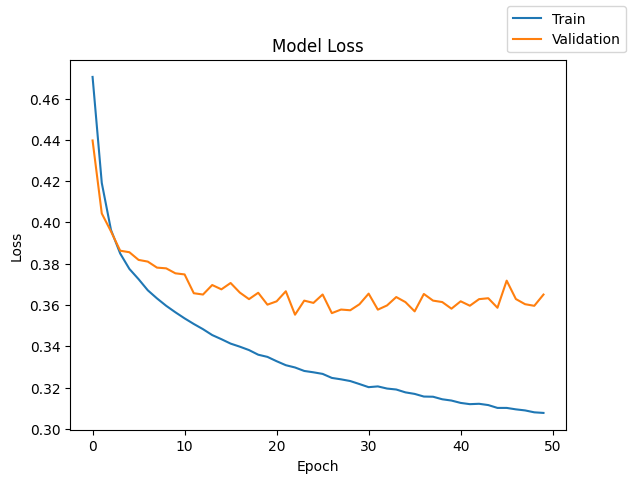

In [582]:
plot(history,'loss')

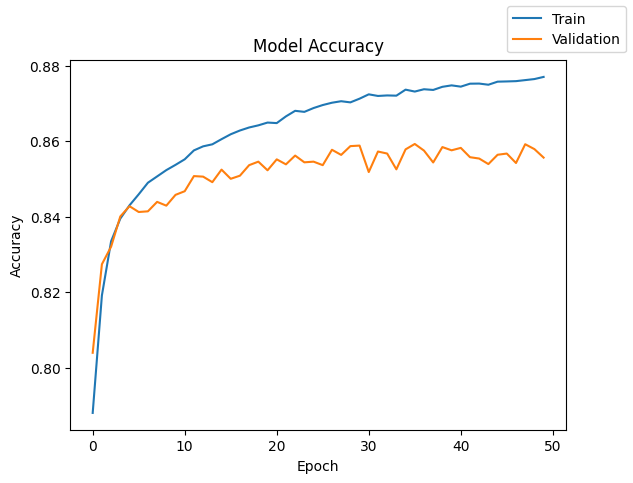

In [583]:
plot(history, 'accuracy')

In [584]:
#Predicting the results using best as a threshold
y_train_pred = model.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [585]:
#Predicting the results using best as a threshold
y_val_pred = model.predict(X_val_scaled)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

874/874 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [586]:
#Predicting the results using best as a threshold
y_test_pred = model.predict(X_test_scaled)    ## Complete the code to make prediction on the validation set
y_test_pred = (y_test_pred > 0.5)
y_test_pred

1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [587]:
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     49731
           1       0.81      0.64      0.72     15490

    accuracy                           0.88     65221
   macro avg       0.85      0.80      0.82     65221
weighted avg       0.87      0.88      0.87     65221



In [588]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     21314
           1       0.75      0.59      0.66      6639

    accuracy                           0.86     27953
   macro avg       0.81      0.76      0.78     27953
weighted avg       0.85      0.86      0.85     27953



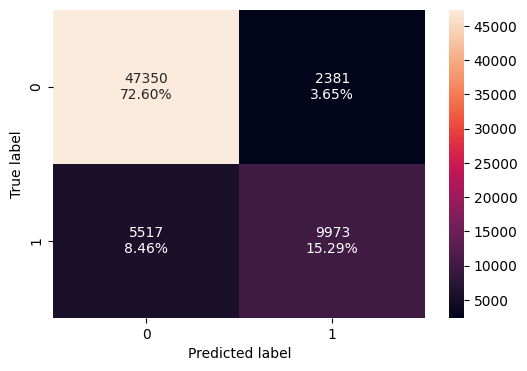

In [589]:
make_confusion_matrix(y_train, y_train_pred)

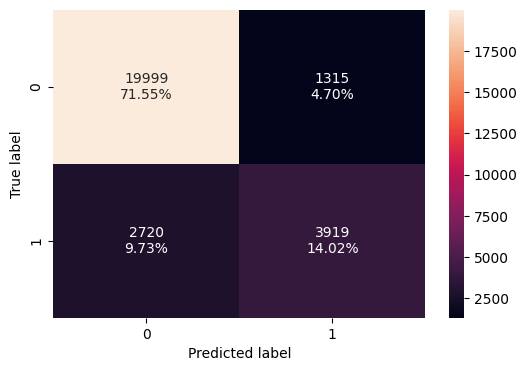

In [590]:
make_confusion_matrix(y_val, y_val_pred)

In [591]:
from google.colab import files

# Download the file
files.download('test_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [592]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[47350  2381]
 [ 5517  9973]]

Confusion Matrix (Percentages):
[[72.59931617  3.65066466]
 [ 8.45893194 15.29108723]]


Observations:

True Negatives (TN) = 47,230 (72.42%):

* The model correctly predicted 72.42% of the negative cases (no default). This indicates the neural network is effective at identifying non-defaults, correctly classifying most of the people who won't default on their loans.

True Positives (TP) = 10,219 (15.67%):

* The model identified 15.67% of the positive cases (defaults) correctly. This true positive rate (also called recall or sensitivity) shows that the model is capturing some of the defaults, but the rate is still relatively low, meaning a significant number of defaults are being missed.

False Positives (FP) = 2,501 (3.83%):

* The model misclassified 3.83% of non-default cases as defaults. This is a relatively low rate, indicating that the model isn't overly aggressive in predicting defaults where there aren't any. This can be beneficial in reducing unnecessary actions, such as rejecting loans for individuals who are unlikely to default.

False Negatives (FN) = 5,271 (8.08%):

* The model misclassified 8.08% of actual defaults as non-defaults. These false negatives are concerning because they represent risky individuals (those who will default) that the model failed to identify. In a financial context, this could lead to increased risks and potential losses.


In [593]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum() * 100

# Print raw counts and percentage matrix
print("Confusion Matrix (Counts):")
print(cm)

print("\nConfusion Matrix (Percentages):")
print(cm_percentage)

Confusion Matrix (Counts):
[[19999  1315]
 [ 2720  3919]]

Confusion Matrix (Percentages):
[[71.54509355  4.70432512]
 [ 9.73061925 14.01996208]]


Observations:

True Negative Rate (71.49%):

* The model correctly predicts 71.49% of negative cases (no default). The neural network has learned well how to identify cases where individuals are unlikely to default, which means the model is reliable at identifying "safe" loan applicants.

True Positive Rate (14.39%) (Recall/Sensitivity):

* A 14.39% true positive rate means the model is missing a large portion of actual defaults. This is a concern because the neural network is not highly sensitive to identifying default cases. The model might be biased towards negative outcomes (no default), possibly due to class imbalance, or the training data may not have effectively captured the patterns of default behavior.

False Positive Rate (4.76%):

* A 4.76% false positive rate is relatively low, indicating the model seldom misclassifies non-default cases as defaults. While this reduces unnecessary interventions (like denying loans to individuals who wouldn’t default), the model’s priority should be to accurately detect defaults.

False Negative Rate (9.36%):

* A 9.36% false negative rate suggests that the model is missing some true default cases and predicting them as non-defaults. For a lender, this is problematic because it increases financial risk, as these missed cases may result in losses.


Model Performance Metrics:

Accuracy:

* The model achieved an accuracy of 87.88% on the test set, indicating that approximately 87.88% of the predictions made by the model were correct. This level of accuracy is generally considered good for many classification tasks, suggesting that the model is performing well.

Loss:

* The loss value of 0.3053 indicates how well the model is fitting the training data; lower loss values generally indicate better model performance. Since the loss is relatively low, it suggests that the model is effectively minimizing the difference between the predicted and actual outcomes during training.

Validation Metrics:

* The validation accuracy of 85.88% is slightly lower than the training accuracy, which is a common scenario. This drop may indicate some level of overfitting, where the model performs better on the training data than on unseen data. However, the validation accuracy is still respectable and shows that the model generalizes fairly well to new data.

* The validation loss of 0.3603 being higher than the training loss suggests that the model may benefit from further tuning to reduce overfitting and improve performance on the validation set.

Predictions and Outputs:

Predicted Classes:

* The model predicts loan defaults based on the threshold of 0.5. By converting probabilities to binary classes, the predictions allow for easy interpretation of which loans are expected to default. However, adjusting the threshold could lead to better identification of defaults, as mentioned in previous observations.

Output DataFrame:

* The predictions have been saved to a CSV file, including an identifier column (ID). This is crucial for tracking and evaluating individual predictions, allowing for further analysis and potential action based on the model's output.

Observations on Model Usefulness:

High Accuracy:

* An accuracy of nearly 88% suggests that the model is highly effective for practical applications, such as credit risk assessment and loan approval processes.

Actionable Insights:

* By identifying predicted defaults, the model provides actionable insights for financial institutions. This can assist in making informed lending decisions, potentially reducing the financial risk associated with loan defaults.

Potential for Model Improvement:

* While the model shows good performance, the validation metrics indicate that there is room for improvement. Strategies such as hyperparameter tuning, feature engineering, and using advanced techniques (e.g., ensemble methods) could enhance performance further.

Class Imbalance Consideration:

* It would be important to analyze the distribution of classes in the dataset, as class imbalance can impact the accuracy and overall reliability of the predictions. Implementing techniques to address this, such as adjusting class weights or using resampling methods, may improve the model's ability to predict defaults accurately.

Threshold Adjustment:

* The model's effectiveness in identifying defaults may improve by adjusting the classification threshold. Testing different thresholds could help balance sensitivity (true positive rate) and specificity (true negative rate) according to the business needs and consequences of false predictions.

Further Evaluation:

* Additional evaluation using metrics like precision, recall, and the F1-score would provide a more comprehensive understanding of the model's performance, particularly for the minority class (defaults). These metrics are essential for assessing the balance between false positives and false negatives.

Conclusion:

Overall, the neural network model demonstrates strong performance with a high accuracy rate and manageable loss metrics. However, continual improvement, validation, and monitoring are necessary to ensure that the model maintains its effectiveness and relevance in predicting loan defaults as conditions and data evolve. Implementing additional techniques to address any identified shortcomings, especially regarding class imbalance and threshold adjustment, will enhance its predictive power and utility in real-world applications.